In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.stats.distributions as dist
from matplotlib.colors import LogNorm

In [2]:
CNN_csv = 'CNN_info_V4.parquet'
CNN_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/'
real_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/REAL_FITS_11_04v2_dir/'
df_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/'
objects_df = pd.read_parquet(df_dir + 'objects_master_22_10_28.parquet')
cnn_run_table = pd.read_parquet(CNN_dir + CNN_csv)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cnn_run_table[-50:])

     RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
389     462       100         50  0.518519   0.432432  0.730290  0.791177   
390     463       100         50  0.465465   0.363363  0.728316  0.783935   
391     464       100         50  0.508509   0.438438  0.697214  0.778339   
392     465       100         50  0.505506   0.439439  0.698483  0.778778   
393     466       100         50  0.486486   0.364364  0.793045  0.820012   
394     467       100         50  0.373373   0.206206  0.770943  0.777303   
395     468       100         50  0.392392   0.237237  0.766924  0.777913   
396     469       100         50  0.554555   0.459459  0.770479  0.776693   
397     470       100         50  0.504505   0.410410  0.772488  0.787065   
398     471       100         50  0.598599   0.362362  0.721078  0.726798   
399     472       100         50  0.566567   0.389389  0.787554  0.811924   
400     473       100         50  0.630631   0.399399  0.851907  0.868162   

In [3]:
#cnn_run_table.sort_values('accuracy', ascending=False)[:20]
cnn_run_table.loc[cnn_run_table['RUN_ID'] == 426][['RUN_ID', 'N_EPOCHS', 'PIX_SCALE', 'TEST_SIZE_TRN', 'TEST_SIZE_VAL',
       'learing_rate', 'patience', 'batch_size', 'ratio_merger',
       'dt_merger', 'ratio_nonmerger', 'dt_nonmerger', 'gal_params', 'grab_list_name', 'boost_massive_gals',
       'AUC', 'merger_params', 'accuracy']]

RUN_ID  N_EPOCHS  PIX_SCALE  TEST_SIZE_TRN  TEST_SIZE_VAL  learing_rate  \
356     426       100         45            0.3            0.5         0.001   

     patience  batch_size  ratio_merger  dt_merger  ratio_nonmerger  \
356        10          32           0.1        0.2           0.0001   

     dt_nonmerger                                        gal_params  \
356           2.0  [[Mstellar, 0.1, 100000000], [Redshift, 1, 2.5]]   

                 grab_list_name boost_massive_gals        AUC  \
356  grablist_run_00417.parquet               True  0.8821942   

                                       merger_params  accuracy  
356  [[Mstellar, 0.075, 1.5], [Redshift, 0.05, 1.5]]  0.811004

In [4]:
mask = []
for row in cnn_run_table[~cnn_run_table['merger_params'].isnull()].merger_params:
#     print(row)
    if len(row) > 1:
#         print(row)
        thing = False
        for param in row:
            if param[0] == 'Redshift':
                for param in row:
                    if param[0] == 'Mstellar':
                        for param in row:
                            if param[0] == 'HMRad':
                                thing = False
                            else:
                                thing = True
    else:
        thing = False
    mask.append(thing)
mass_z_ = cnn_run_table[~cnn_run_table['merger_params'].isnull()][mask]

In [5]:
mass_z_[['RUN_ID', 'N_EPOCHS', 'PIX_SCALE', 'TEST_SIZE_TRN', 'TEST_SIZE_VAL',
       'learing_rate', 'patience', 'batch_size', 'N_PICTURES', 'ratio_merger',
       'dt_merger', 'ratio_nonmerger', 'dt_nonmerger', 'gal_params', 'grab_list_name', 'boost_massive_gals',
       'AUC', 'merger_params', 'accuracy']].sort_values('accuracy', ascending=False)

RUN_ID  N_EPOCHS  PIX_SCALE  TEST_SIZE_TRN  TEST_SIZE_VAL  learing_rate  \
400     473       100         50            0.3            0.5        0.0010   
428     501       100         50            0.3            0.5        0.0010   
425     498       100         50            0.3            0.5        0.0010   
429     502       100         50            0.3            0.5        0.0010   
431     504       100         50            0.3            0.5        0.0010   
..      ...       ...        ...            ...            ...           ...   
384     457       100         50            0.3            0.5        0.0001   
383     456       100         50            0.3            0.5        0.0001   
386     459       100         50            0.3            0.5        0.0001   
411     484       100         50            0.3            0.5        0.0010   
373     446       100         50            0.3            0.5        0.0001   

     patience  batch_size  N_PICTURES  ratio_merger  dt_merger  \
400        10          32       11988           0.1        0.2   
428        10          32       11988           0.1        0.2   
425        10          32       11988           0.1        0.2   
429        10          32       11988           0.1        0.2   
431        10          32       11988           0.1        0.2   
..        ...         ...         ...           ...        ...   
384        10          32       39258           0.1        0.2   
383        10          32       39258           0.1        0.2   
386        10          32       39258           0.1        0.2   
411        10          32       39258           0.1        0.2   
373        10          32       39258           0.1        0.2   

     ratio_nonmerger  dt_nonmerger  \
400          0.10000           1.0   
428          0.10000           1.0   
425          0.10000           1.0   
429          0.10000           1.0   
431          0.10000           1.0   
..               ...           ...   
384          0.10000           1.0   
383          0.10000           1.0   
386          0.10000           1.0   
411          0.00001           2.0   
373          0.10000           1.0   

                                           gal_params  \
400  [[Mstellar, 0.1, 100000000], [Redshift, 1.5, 2]]   
428  [[Mstellar, 0.1, 100000000], [Redshift, 1, 1.5]]   
425  [[Mstellar, 0.1, 100000000], [Redshift, 1, 1.5]]   
429  [[Mstellar, 0.1, 100000000], [Redshift, 1, 1.5]]   
431  [[Mstellar, 0.1, 100000000], [Redshift, 1, 1.5]]   
..                                                ...   
384  [[Mstellar, 0.1, 100000000], [Redshift, 1, 2.5]]   
383  [[Mstellar, 0.1, 100000000], [Redshift, 1, 2.5]]   
386  [[Mstellar, 0.1, 100000000], [Redshift, 1, 2.5]]   
411  [[Mstellar, 0.1, 100000000], [Redshift, 1, 2.5]]   
373  [[Mstellar, 0.1, 100000000], [Redshift, 1, 2.5]]   

                 grab_list_name boost_massive_gals         AUC  \
400  grablist_run_00471.parquet               True  0.90610415   
428  grablist_run_00471.parquet               True     0.89529   
425  grablist_run_00471.parquet               True  0.88708556   
429  grablist_run_00471.parquet               True    0.891369   
431  grablist_run_00471.parquet               True   0.8920494   
..                          ...                ...         ...   
384  grablist_run_00443.parquet               True    0.822384   
383  grablist_run_00443.parquet               True   0.8188032   
386  grablist_run_00443.parquet               True  0.81755686   
411  grablist_run_00474.parquet               True  0.81498384   
373  grablist_run_00443.parquet               True  0.80381894   

                                       merger_params  accuracy  
400  [[Mstellar, 0.075, 1.5], [Redshift, 0.05, 1.5]]  0.833797  
428  [[Mstellar, 0.075, 1.5], [Redshift, 0.05, 1.5]]  0.826570  
425  [[Mstellar, 0.075, 1.5], [Redshift, 0.05, 1.5]]  0.822679  
429  [[Mstellar, 0.075, 1.5], [Redshift, 0.05, 1.5]]  0.

In [6]:
filtered = cnn_run_table.loc[(cnn_run_table.boost_massive_gals == 'True') & (cnn_run_table.ratio_merger == 0.1) & 
                 (cnn_run_table.dt_merger == 0.2) 
                            & (cnn_run_table.N_EPOCHS == 100) & (cnn_run_table.merger_params.values == 'Mstellar')]

filtered.columns

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['RUN_ID', 'N_EPOCHS', 'PIX_SCALE', 'TH_OPT', 'TH_OPT_F1', 'TRA_ACC',
       'VAL_ACC', 'TRA_LOSS', 'VAL_LOSS', 'TEST_SIZE_TRN', 'TEST_SIZE_VAL',
       'N_PICTURES', 'learing_rate', 'patience', 'batch_size', 'ratio_merger',
       'dt_merger', 'ratio_nonmerger', 'dt_nonmerger', 'snap_lower',
       'snap_upper', 'gal_params', 'grab_list_name', 'boost_massive_gals',
       'random_state', 'AUC', 'merger_params', 'accuracy', 'accuracy_F1',
       'accuracy_05', 'Time_stamp', 'Epochs_used', 'Best_epoch'],
      dtype='object')

In [7]:
filtered[['RUN_ID', 'N_EPOCHS', 'PIX_SCALE', 'TEST_SIZE_TRN', 'TEST_SIZE_VAL',
       'learing_rate', 'patience', 'batch_size', 'N_PICTURES', 'ratio_merger',
       'dt_merger', 'ratio_nonmerger', 'dt_nonmerger', 'gal_params', 'grab_list_name', 'boost_massive_gals',
       'AUC', 'merger_params', 'accuracy']].sort_values('accuracy', ascending=False)[:30]

Empty DataFrame
Columns: [RUN_ID, N_EPOCHS, PIX_SCALE, TEST_SIZE_TRN, TEST_SIZE_VAL, learing_rate, patience, batch_size, N_PICTURES, ratio_merger, dt_merger, ratio_nonmerger, dt_nonmerger, gal_params, grab_list_name, boost_massive_gals, AUC, merger_params, accuracy]
Index: []

In [8]:
def save_results(run_id):

    CNN_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_%05d/' %(run_id)
    subhalos_csv = 'CNN_run_%05d_subhalo_labels.csv' %(run_id)
    CNN_csv = 'CNN_run_%05d_info.csv' %(run_id)
    results = pd.read_csv(CNN_dir + subhalos_csv)
    df_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/'
    objects_df = pd.read_parquet(df_dir + 'objects_master_22_10_28.parquet')
    
    out = []
    for idx, row in results.iterrows():
        
        halo = objects_df.loc[(objects_df['SFID'] == row.SFID) & (objects_df['SnapNum'] == row.SNAP)]
        out.append(halo.values.flatten().tolist())
        gas_frac = (halo['Mgas'].values/halo['Mstellar'].values).flatten()[0]
        
        if gas_frac == float('-inf'):
            gas_frac = 0
            
        out[-1].extend([gas_frac, row.PRED_LABEL, row.LABEL])

    cols = objects_df.columns.values.tolist()
    cols.extend(['GAS_FRAC', 'PRED_LABEL', 'LABEL'])
    results = pd.DataFrame(out,columns = cols)
    
    G = 6.6743e-11 #m^3 kg^-1 s^-2
    c = 3e8 #ms^-1
    mp = 1.673e-27 #kg
    sigma_e = 6.65e-29 #m^2

    L = results['BHacc'] * 0.1 * c**2 / (0.978e9 * 3.154e7) * 0.7 # (1e10 Msol/h) m^2 s^-3
    Ledd = 4*np.pi*G*c*mp/sigma_e * results['MBH'] # (1e10 Msol/h) m^2 s^-3
    results['Edd_ratio'] = L/Ledd
    
    results.to_parquet(CNN_dir + 'full_subhalo_results.parquet')

def load_results(run_ids):
    output = {}
    for run_id in run_ids:
        results = pd.read_parquet('/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_%05d/' %(run_id) + 'full_subhalo_results_v2.parquet')
        output[run_id] = results
    run_info = cnn_run_table[cnn_run_table.RUN_ID.isin(run_ids)] 
    
    return output, run_info


#results_list, run_info = load_results([115,117, 111, 128, 132, 134])
#results_list, run_info = load_results([175,176, 177, 178])

#results_list, run_info = load_results([179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 115])
#results_list, run_info = load_results([181, 204, 206, 207, 208, 209, 203, 202, 201, 200, 199, 193, 178, 176, 175])
#save_results(329)
#save_results(326)
results_list, run_info = load_results([477, 478, 479, 480, 486, 489])

for results in results_list.values():
    results['Mass/radius**2'] = results['Mstellar'] / results['HMRad'] ** 2
    results['SFR/Mass'] = results['SFR']/results['Mstellar']

In [16]:
run_info[['RUN_ID', 'N_EPOCHS', 'PIX_SCALE', 'TEST_SIZE_TRN', 'TEST_SIZE_VAL',
       'learing_rate', 'patience', 'batch_size', 'ratio_merger',
       'dt_merger', 'ratio_nonmerger', 'dt_nonmerger', 'gal_params', 'grab_list_name', 'boost_massive_gals',
       'AUC', 'merger_params', 'accuracy']]

RUN_ID  N_EPOCHS  PIX_SCALE  TEST_SIZE_TRN  TEST_SIZE_VAL  learing_rate  \
179     237       100         50            0.2            0.5       0.00125   
185     247       100         50            0.2            0.5       0.00125   
259     326       100         50            0.2            0.5       0.00060   
262     329       100         50            0.2            0.5       0.00080   

     patience  batch_size  ratio_merger  dt_merger  ratio_nonmerger  \
179        20          32           0.1        0.2              0.1   
185        20          32           0.1        0.2              0.1   
259        25          32           0.1        0.2              0.1   
262        25          32           0.1        0.2              0.1   

     dt_nonmerger                                         gal_params  \
179           1.0  [[Mstellar, 0.1, 100000000.0], [Redshift, 1.0,...   
185           1.0  [[Mstellar, 0.1, 100000000.0], [Redshift, 1.0,...   
259           1.0  [[Mstellar, 0.1, 100000000.0], [Redshift, 1.0,...   
262           1.0  [[Mstellar, 0.1, 100000000.0], [Redshift, 1.0,...   

                 grab_list_name boost_massive_gals         AUC  \
179  grablist_run_00224.parquet               True   0.8745198   
185  grablist_run_00224.parquet               True  0.87152165   
259  grablist_run_00229.parquet               True   0.9116483   
262  grablist_run_00229.parquet               True   0.9096905   

                                    merger_params  accuracy  
179  [[Mstellar, 0.075, 1.5], [HMRad, 0.05, 1.5]]  0.800306  
185  [[Mstellar, 0.075, 1.5], [HMRad, 0.05, 1.5]]  0.794447  
259                       [[Redshift, 0.05, 1.5]]  0.828069  
262                       [[Redshift, 0.05, 1.5]]  0.832145

In [9]:
results_list[329]

SFID  SnapNum  Mstellar       MBH         MDM       Mgas        SFR  \
0     249814.0     32.0  0.186945  0.000246   17.362432   2.477809   5.568468   
1     174924.0     49.0  0.194262  0.000199    6.368720   0.991994   2.379050   
2     110454.0     49.0  0.130248  0.000000    0.264921   0.069107   0.445205   
3      59211.0     31.0  4.879585  0.031219  161.113388  23.070415   9.887483   
4     267662.0     43.0  0.213593  0.000183   31.130737   6.045436   3.321641   
...        ...      ...       ...       ...         ...        ...        ...   
3921  337507.0     39.0  0.332990  0.000499   17.198120   2.456110   2.590434   
3922  272561.0     42.0  0.834856  0.001375   48.650402   6.301243  20.339876   
3923  128015.0     37.0  0.166046  0.000190    9.073036   1.627934   2.730540   
3924  300089.0     37.0  0.311259  0.000541   14.044349   2.100394   2.908172   
3925  257793.0     37.0  0.106856  0.000136   25.468811   3.558491   1.623684   

             Z     HMRad     BHacc  ...  CircTwiceBelow0Frac_allstars  \
0     0.007772  7.444120  0.000435  ...                      0.465107   
1     0.008221  5.442171  0.000353  ...                      0.616887   
2     0.020623  2.659356  0.000000  ...                      0.810288   
3     0.015370  6.158922  0.000482  ...                      0.439508   
4     0.006290  7.684510  0.000078  ...                      0.416638   
...        ...       ...       ...  ...                           ...   
3921  0.009364  9.940527  0.000197  ...                      0.777298   
3922  0.012986  4.830738  0.000278  ...                      0.513111   
3923  0.007972  5.725197  0.000164  ...                      0.373080   
3924  0.010362  7.075463  0.002063  ...                      0.432696   
3925  0.008174  4.904161  0.000125  ...                      0.809205   

      r1_Mstellar  r1_HMRad      r_sep   GAS_FRAC  PRED_LABEL  LABEL  \
0        0.005578  0.002762  55.024106  13.254201    0.820121    1.0   
1        0.002081  0.001026  20.143635   5.106473    0.913813    1.0   
2        1.752669  0.876321  11.092952   0.530581    0.008027    0.0   
3        0.034028  0.016966   3.523586   4.727946    0.986348    1.0   
4        0.002154  0.001046   8.913928  28.303589    0.453349    0.0   
...           ...       ...        ...        ...         ...    ...   
3921     0.025986  0.012943   0.578560   7.375935    0.349684    1.0   
3922     0.008163  0.004025  14.068405   7.547704    0.998830    1.0   
3923     0.004339  0.002119  17.542017   9.804135    0.083386    0.0   
3924     0.001891  0.000945  13.315333   6.748057    0.013509    0.0   
3925     0.026773  0.013337  14.762209  33.301778    0.872947    0.0   

      Edd_ratio  Mass/radius**2   SFR/Mass  
0      0.057129        0.003374  29.786631  
1      0.057298        0.006559  12.246593  
2           NaN        0.018417   3.418128  
3      0.000498        0.128639   2.026296  
4      0.013780        0.003617  15.551296  
...         ...             ...        ...  
3921   0.012728        0.003370   7.779325  
3922   0.006522        0.035775  24.363348  
3923   0.027810        0.005066  16.444517  
3924   0.123064        0.006217   9.343252  
3925   0.029666        0.004443  15.195078  

[3926 rows x 38 columns]

In [10]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

In [18]:
scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1/0.7, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1e10/((1/0.7)**2), 'SFR/Mass' :1e-10, 'r_sep':1}
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)', 'SFR/Mass':'SFR/Mass', 'r_sep':'log10(r_sep)'}
title_labels = {0: '(No boosting or HMrad matching)', 1: '(No boosting or HMrad matching)' , 2: '(Boosting and HMrad matching)', 3: '(Boosting and HMrad matching)', 4: '(Boosting + HMrad matching + Higher M cutoff)', 5: '(Boosting + HMrad matching + Higher M cutoff)', 6: '(Boosting + HMrad matching + Higher M cutoff)'}


def plot_multi_results(results_list, params, no_log):
    
    for param in params:
        
        fig = plt.figure(figsize = (15,6 * len(results_list)))
        ax = fig.subplots(len(results_list),2)
        
        probs = []
        
        for i, results in enumerate(results_list):
            
            if param == 'Edd_ratio':
                results = results.loc[results['Edd_ratio'] > 1e-6]
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][param].values, histedges_equalN(results.loc[results['LABEL'] == 1][param].values, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results.loc[results['LABEL'] == 0][param].values, bins = edges_M, histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TN')

            else:

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values * scale[param])

                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                
                counts_M_total, edges_M, bars = ax[i,0].hist(results_M_total, histedges_equalN(results_M_total, 50), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, histedges_equalN(results_NM_total, 50), histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,0].hist(results_NM, bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for j in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            ax[i,0].set_title(param + ' distribution')
            ax[i,0].set_ylabel('# counts')
            ax[i,0].set_xlabel(xlabels[param])
            ax[i,0].legend()
            
            #probs.append([probs_M_total, probs_M, probs_NM_total, probs_NM, bin_edges])


            centers = 0.5*(edges[1:]+ edges[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            ax[i,1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[i,1].errorbar(centers, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            probs.append([counts_M/counts_M_total, ])
            
            ax[i,1].set_ylabel('Fraction correctly identified')
            ax[i,1].set_title('Correct fraction binned by ' + param)
            ax[i,1].set_ylim(0, 1.05)
            ax[i,1].set_xlabel(xlabels[param])
            ax[i,1].legend()

        plt.tight_layout()

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/li

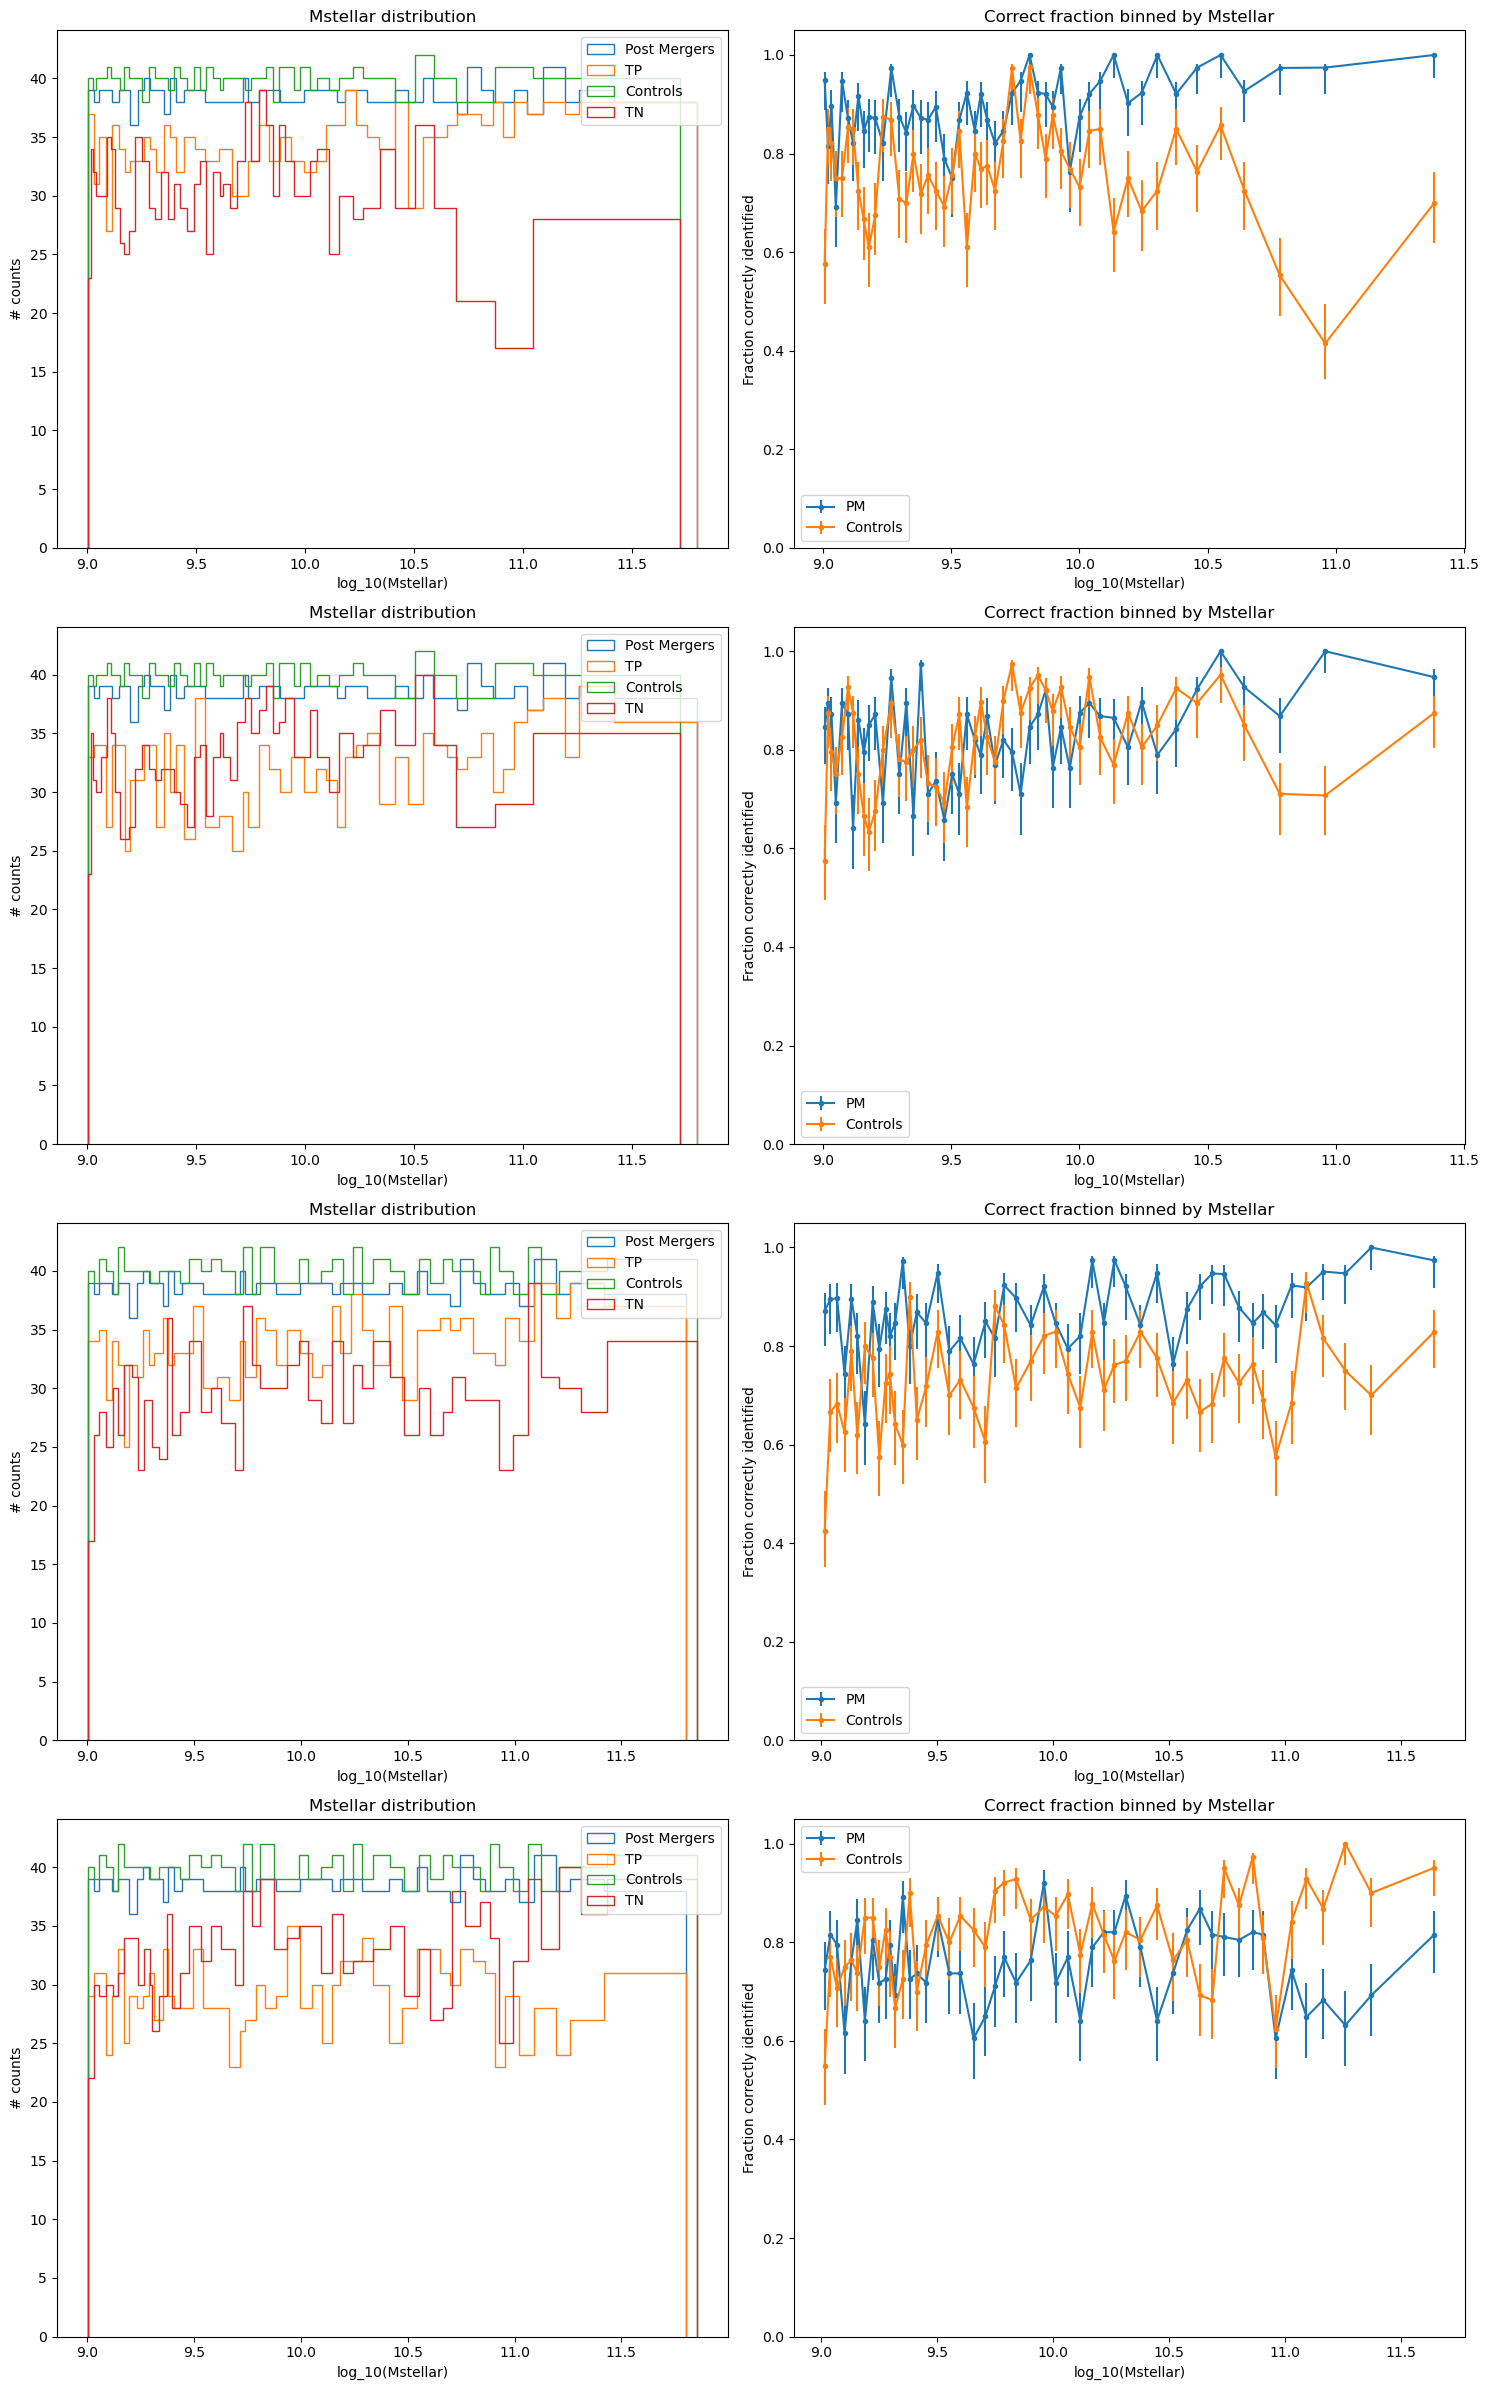

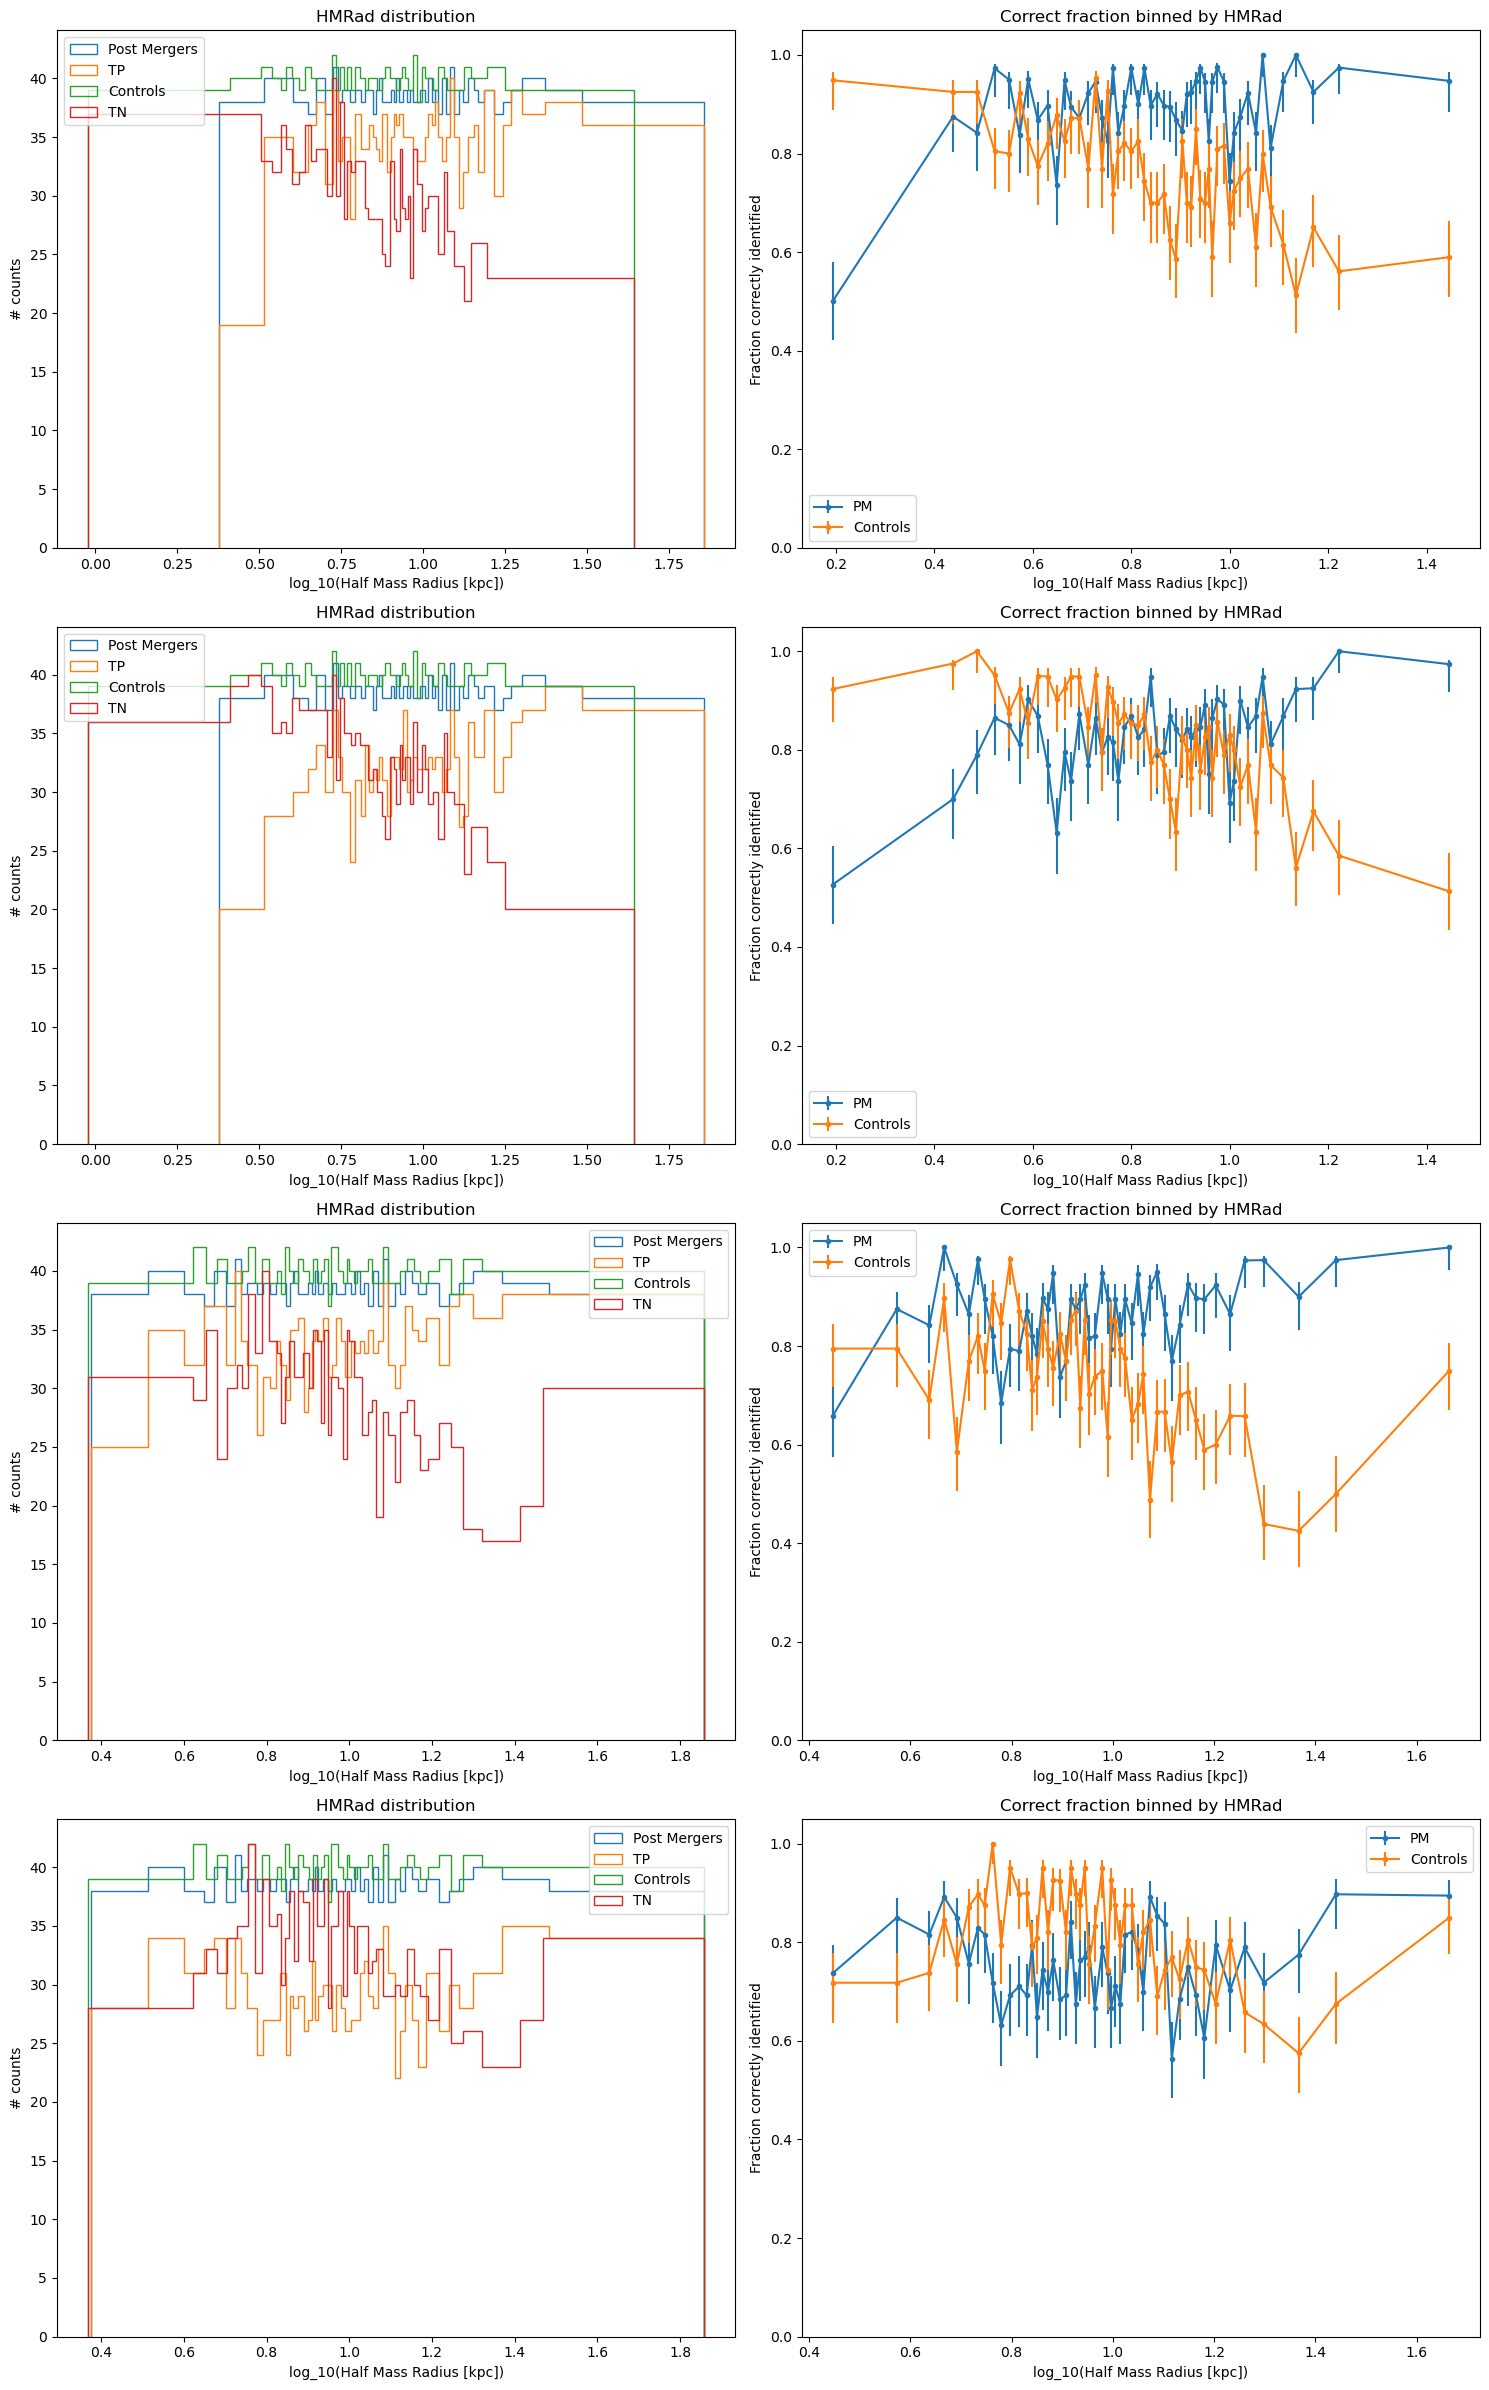

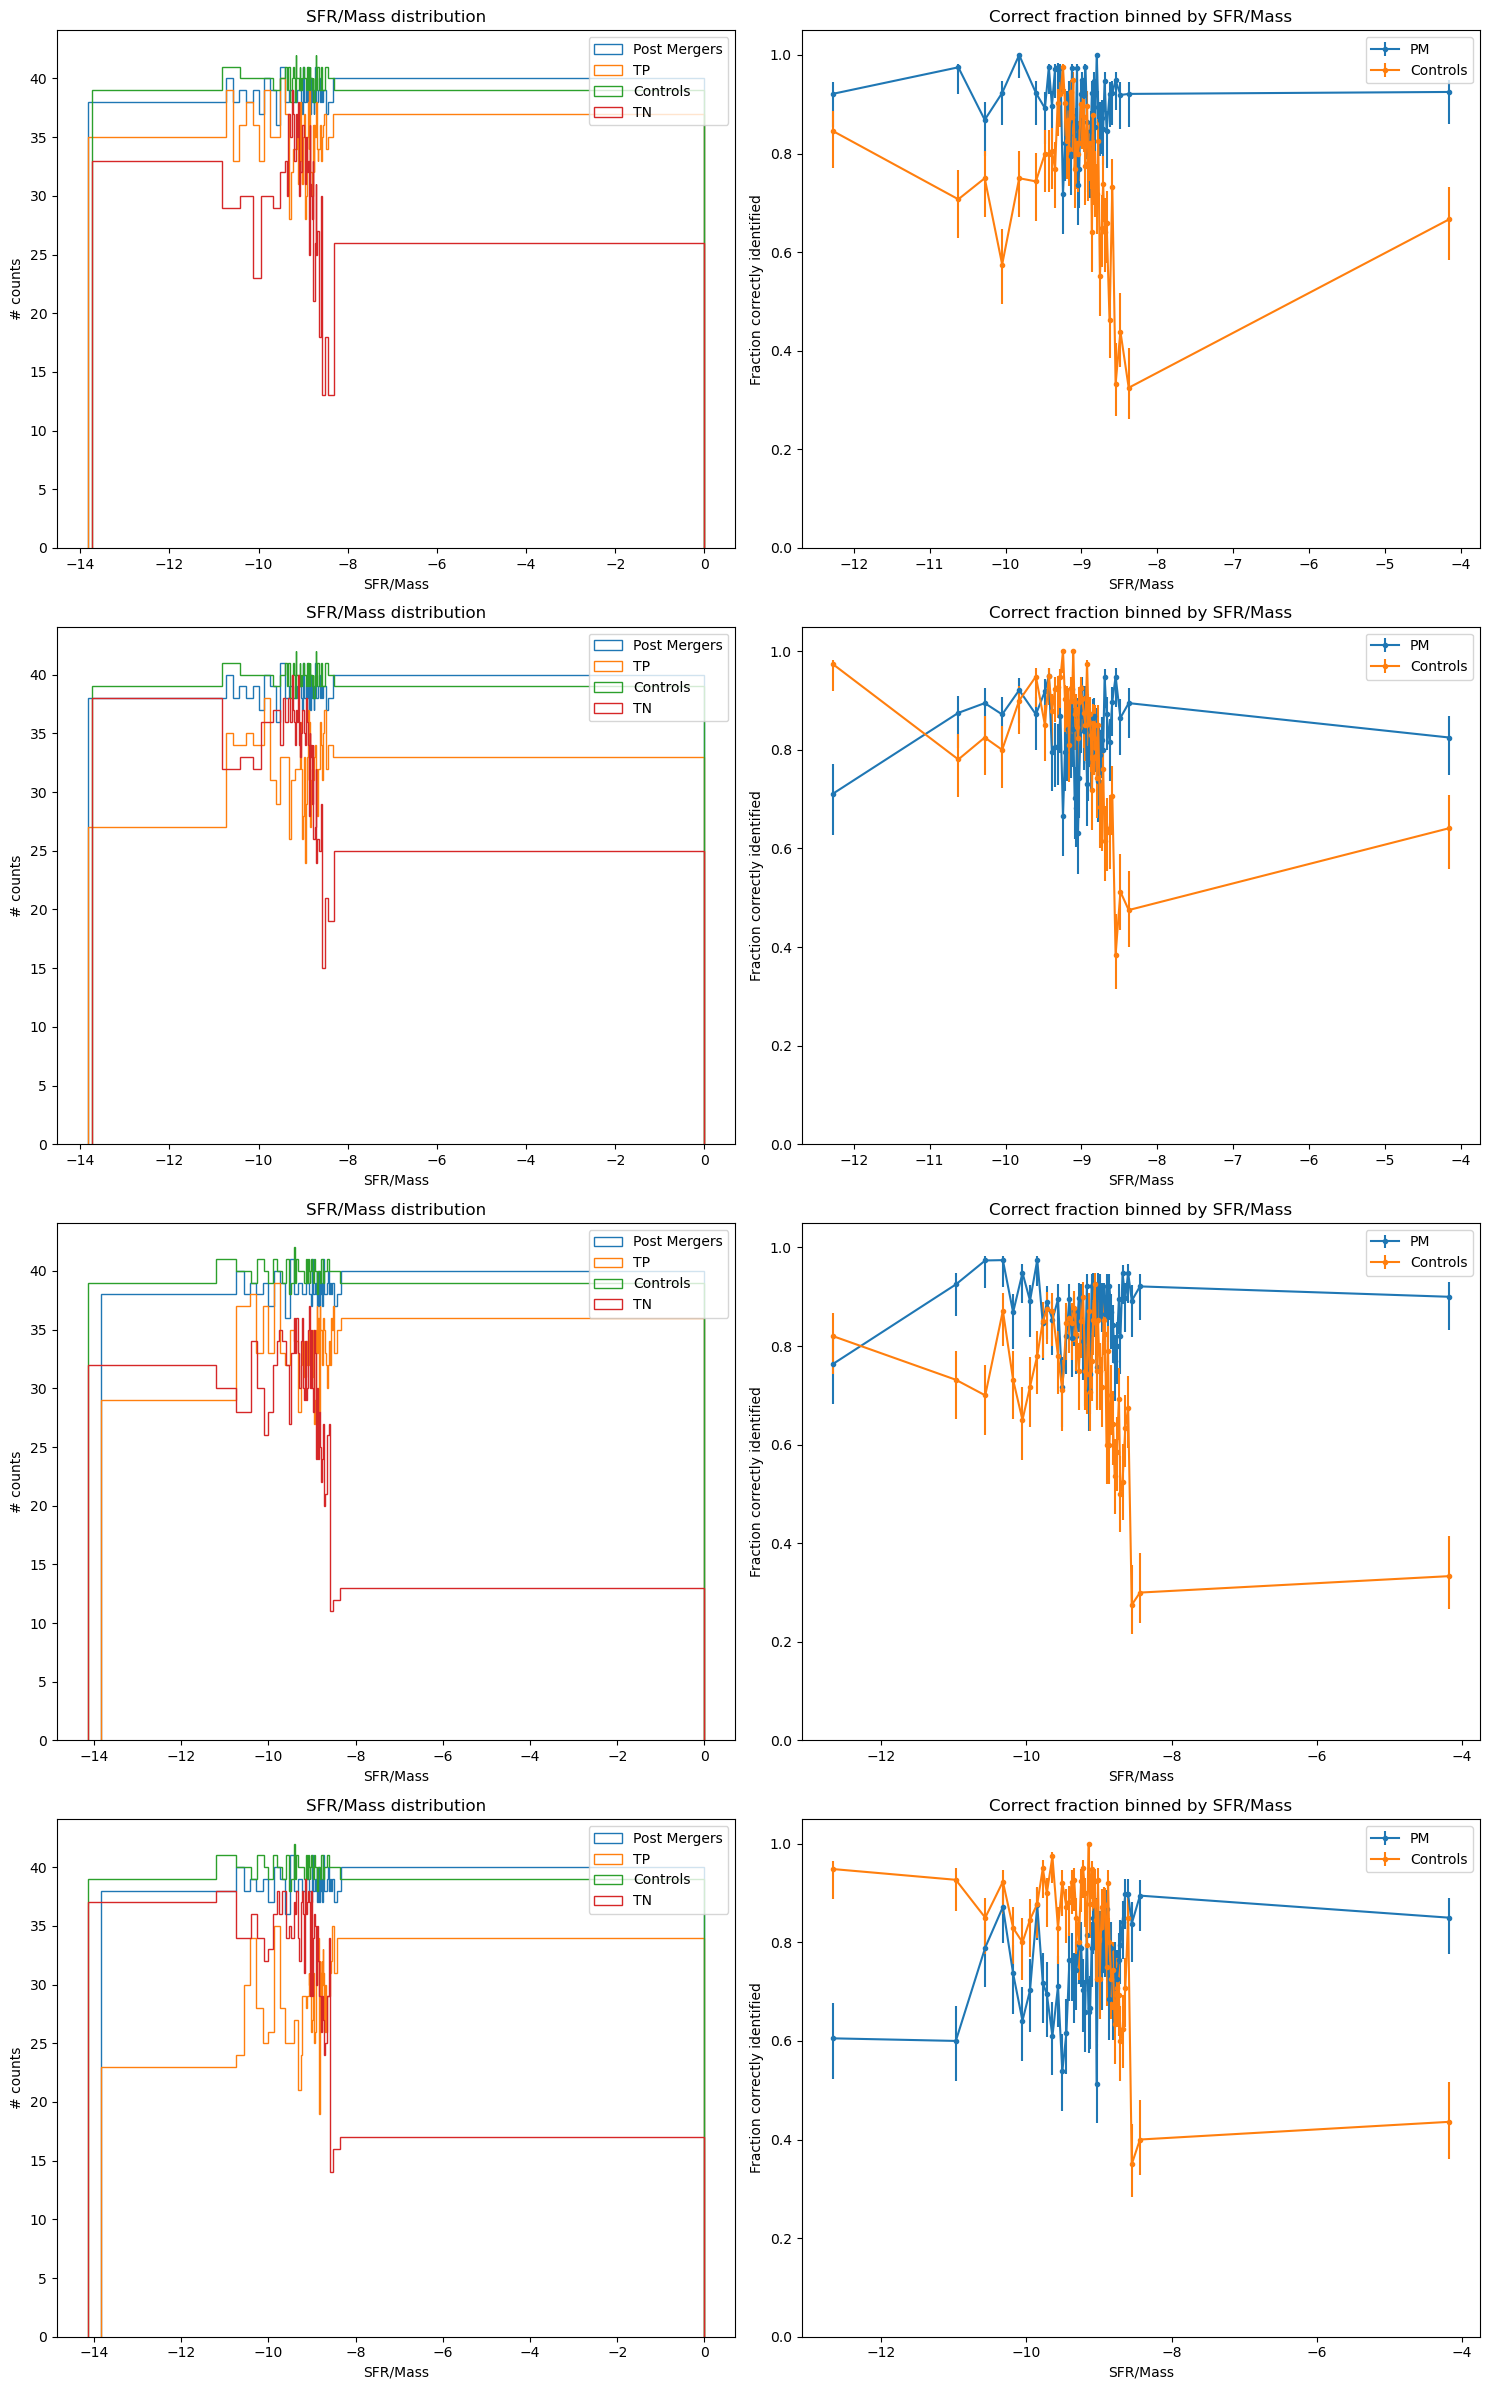

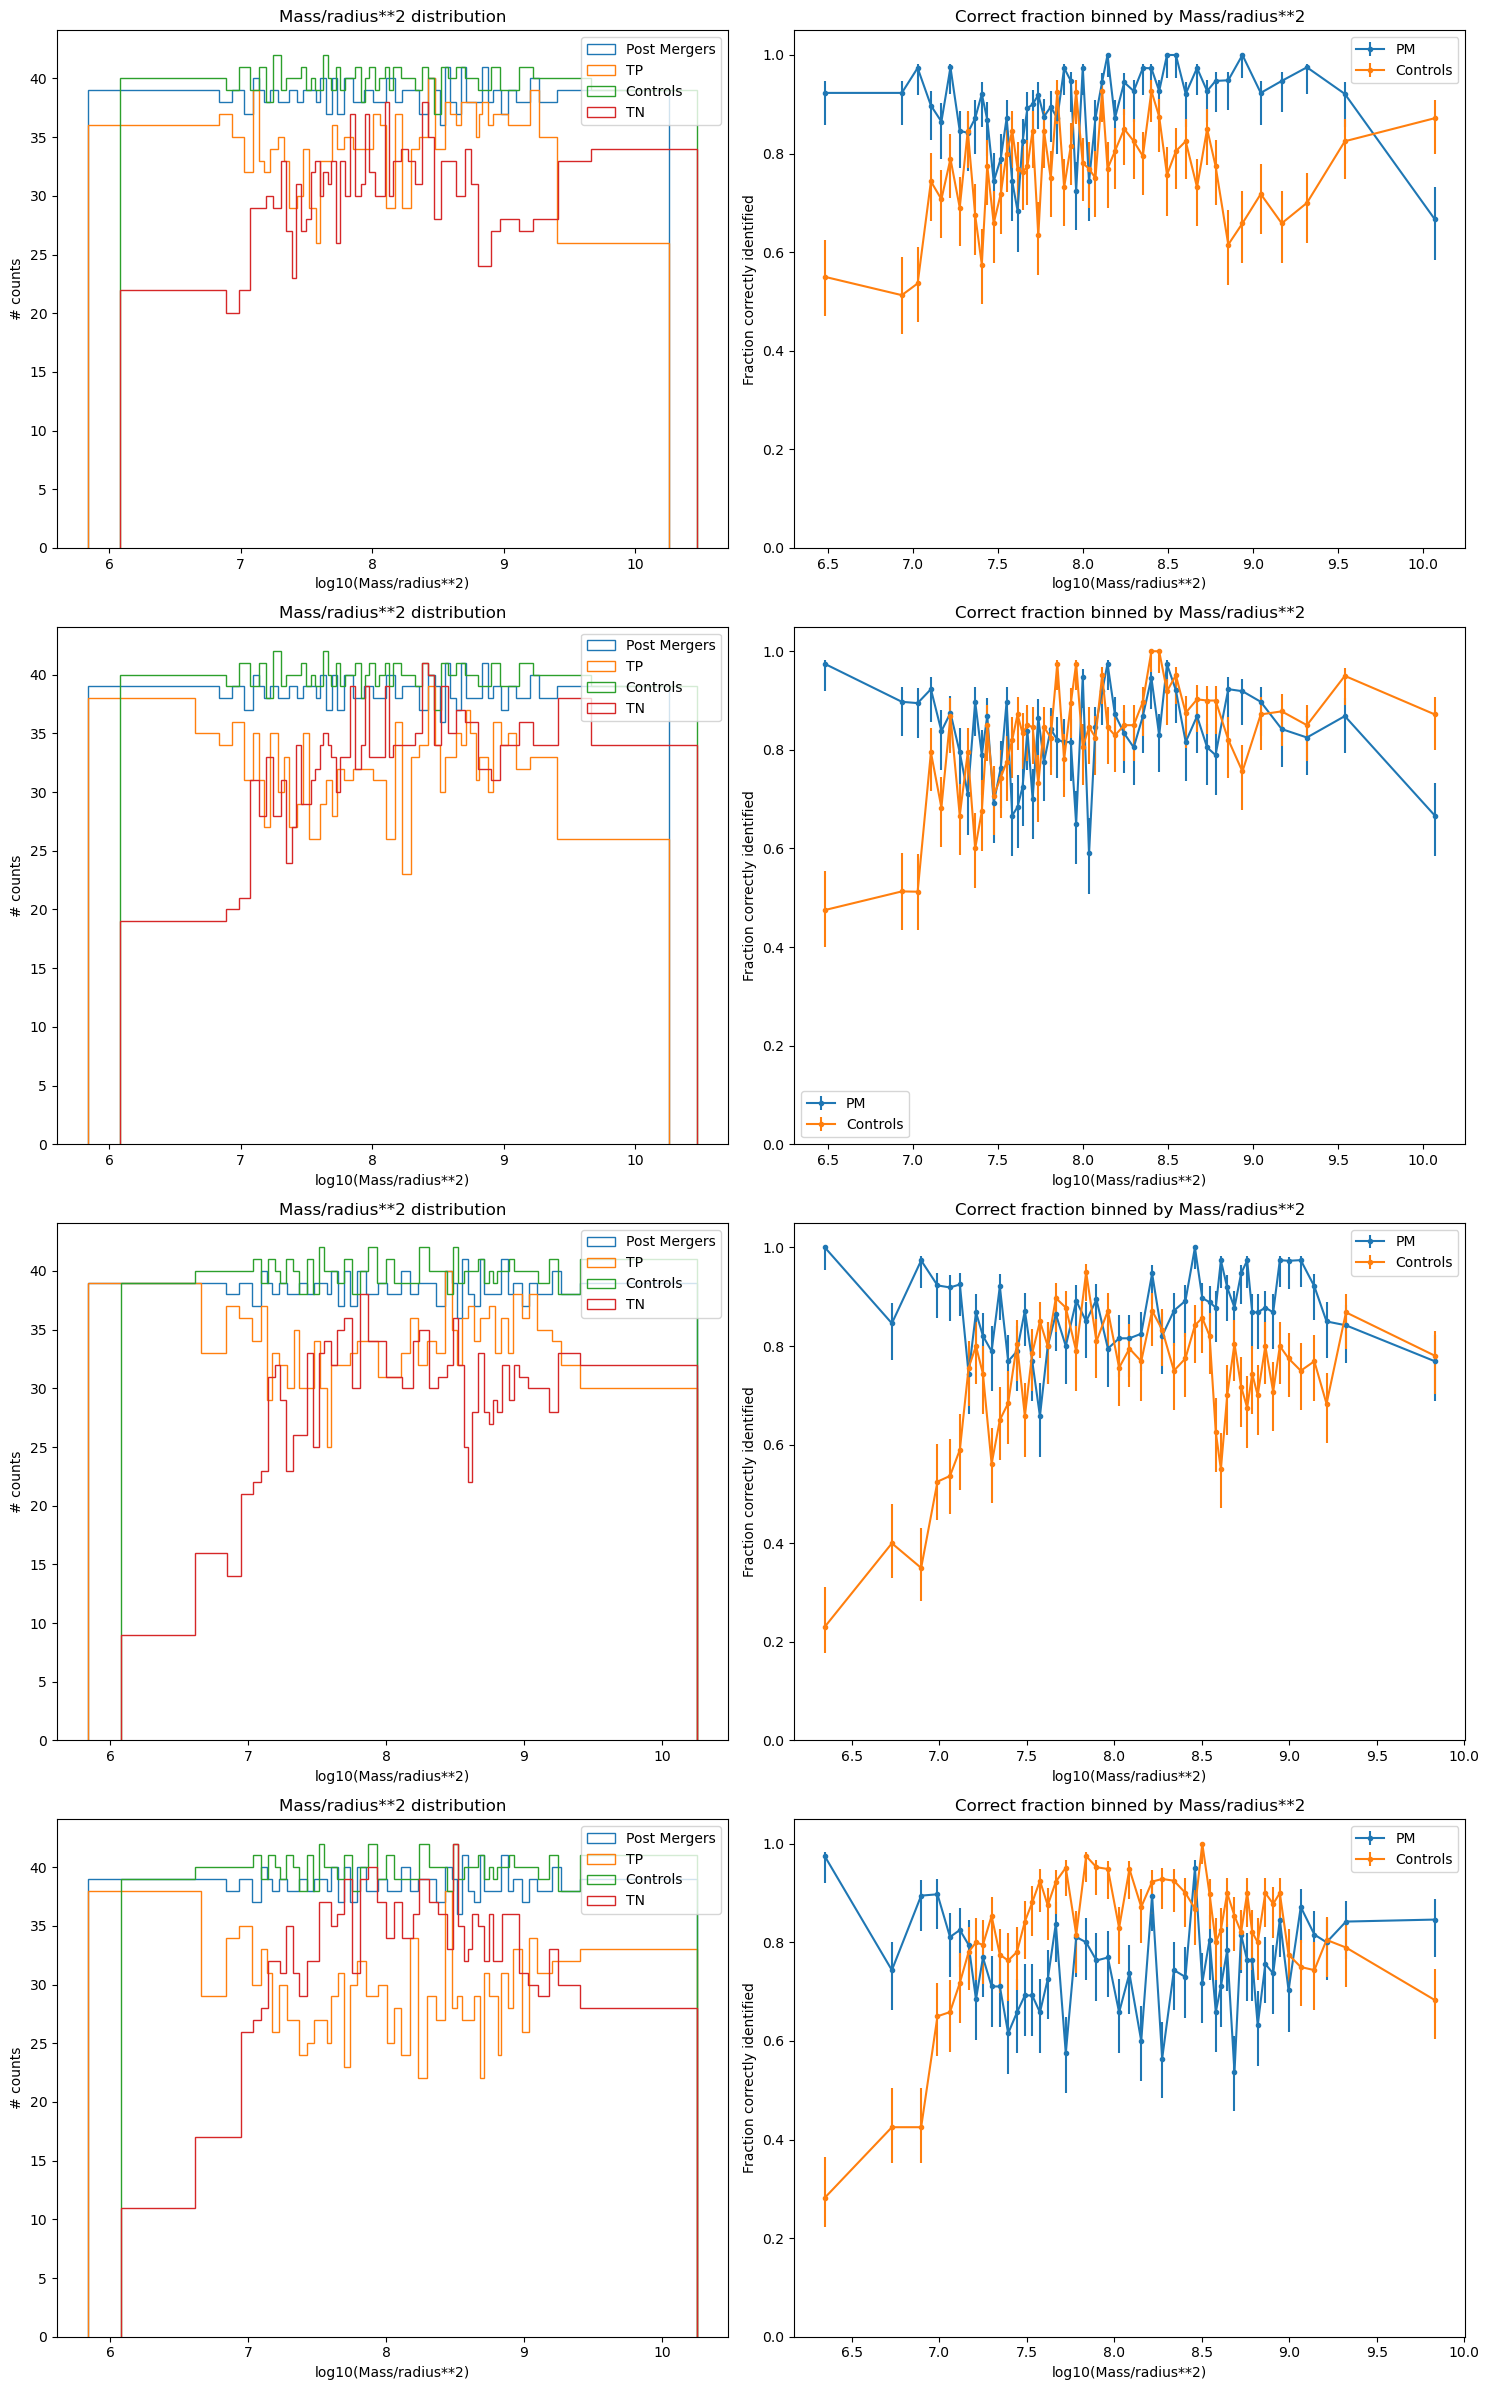

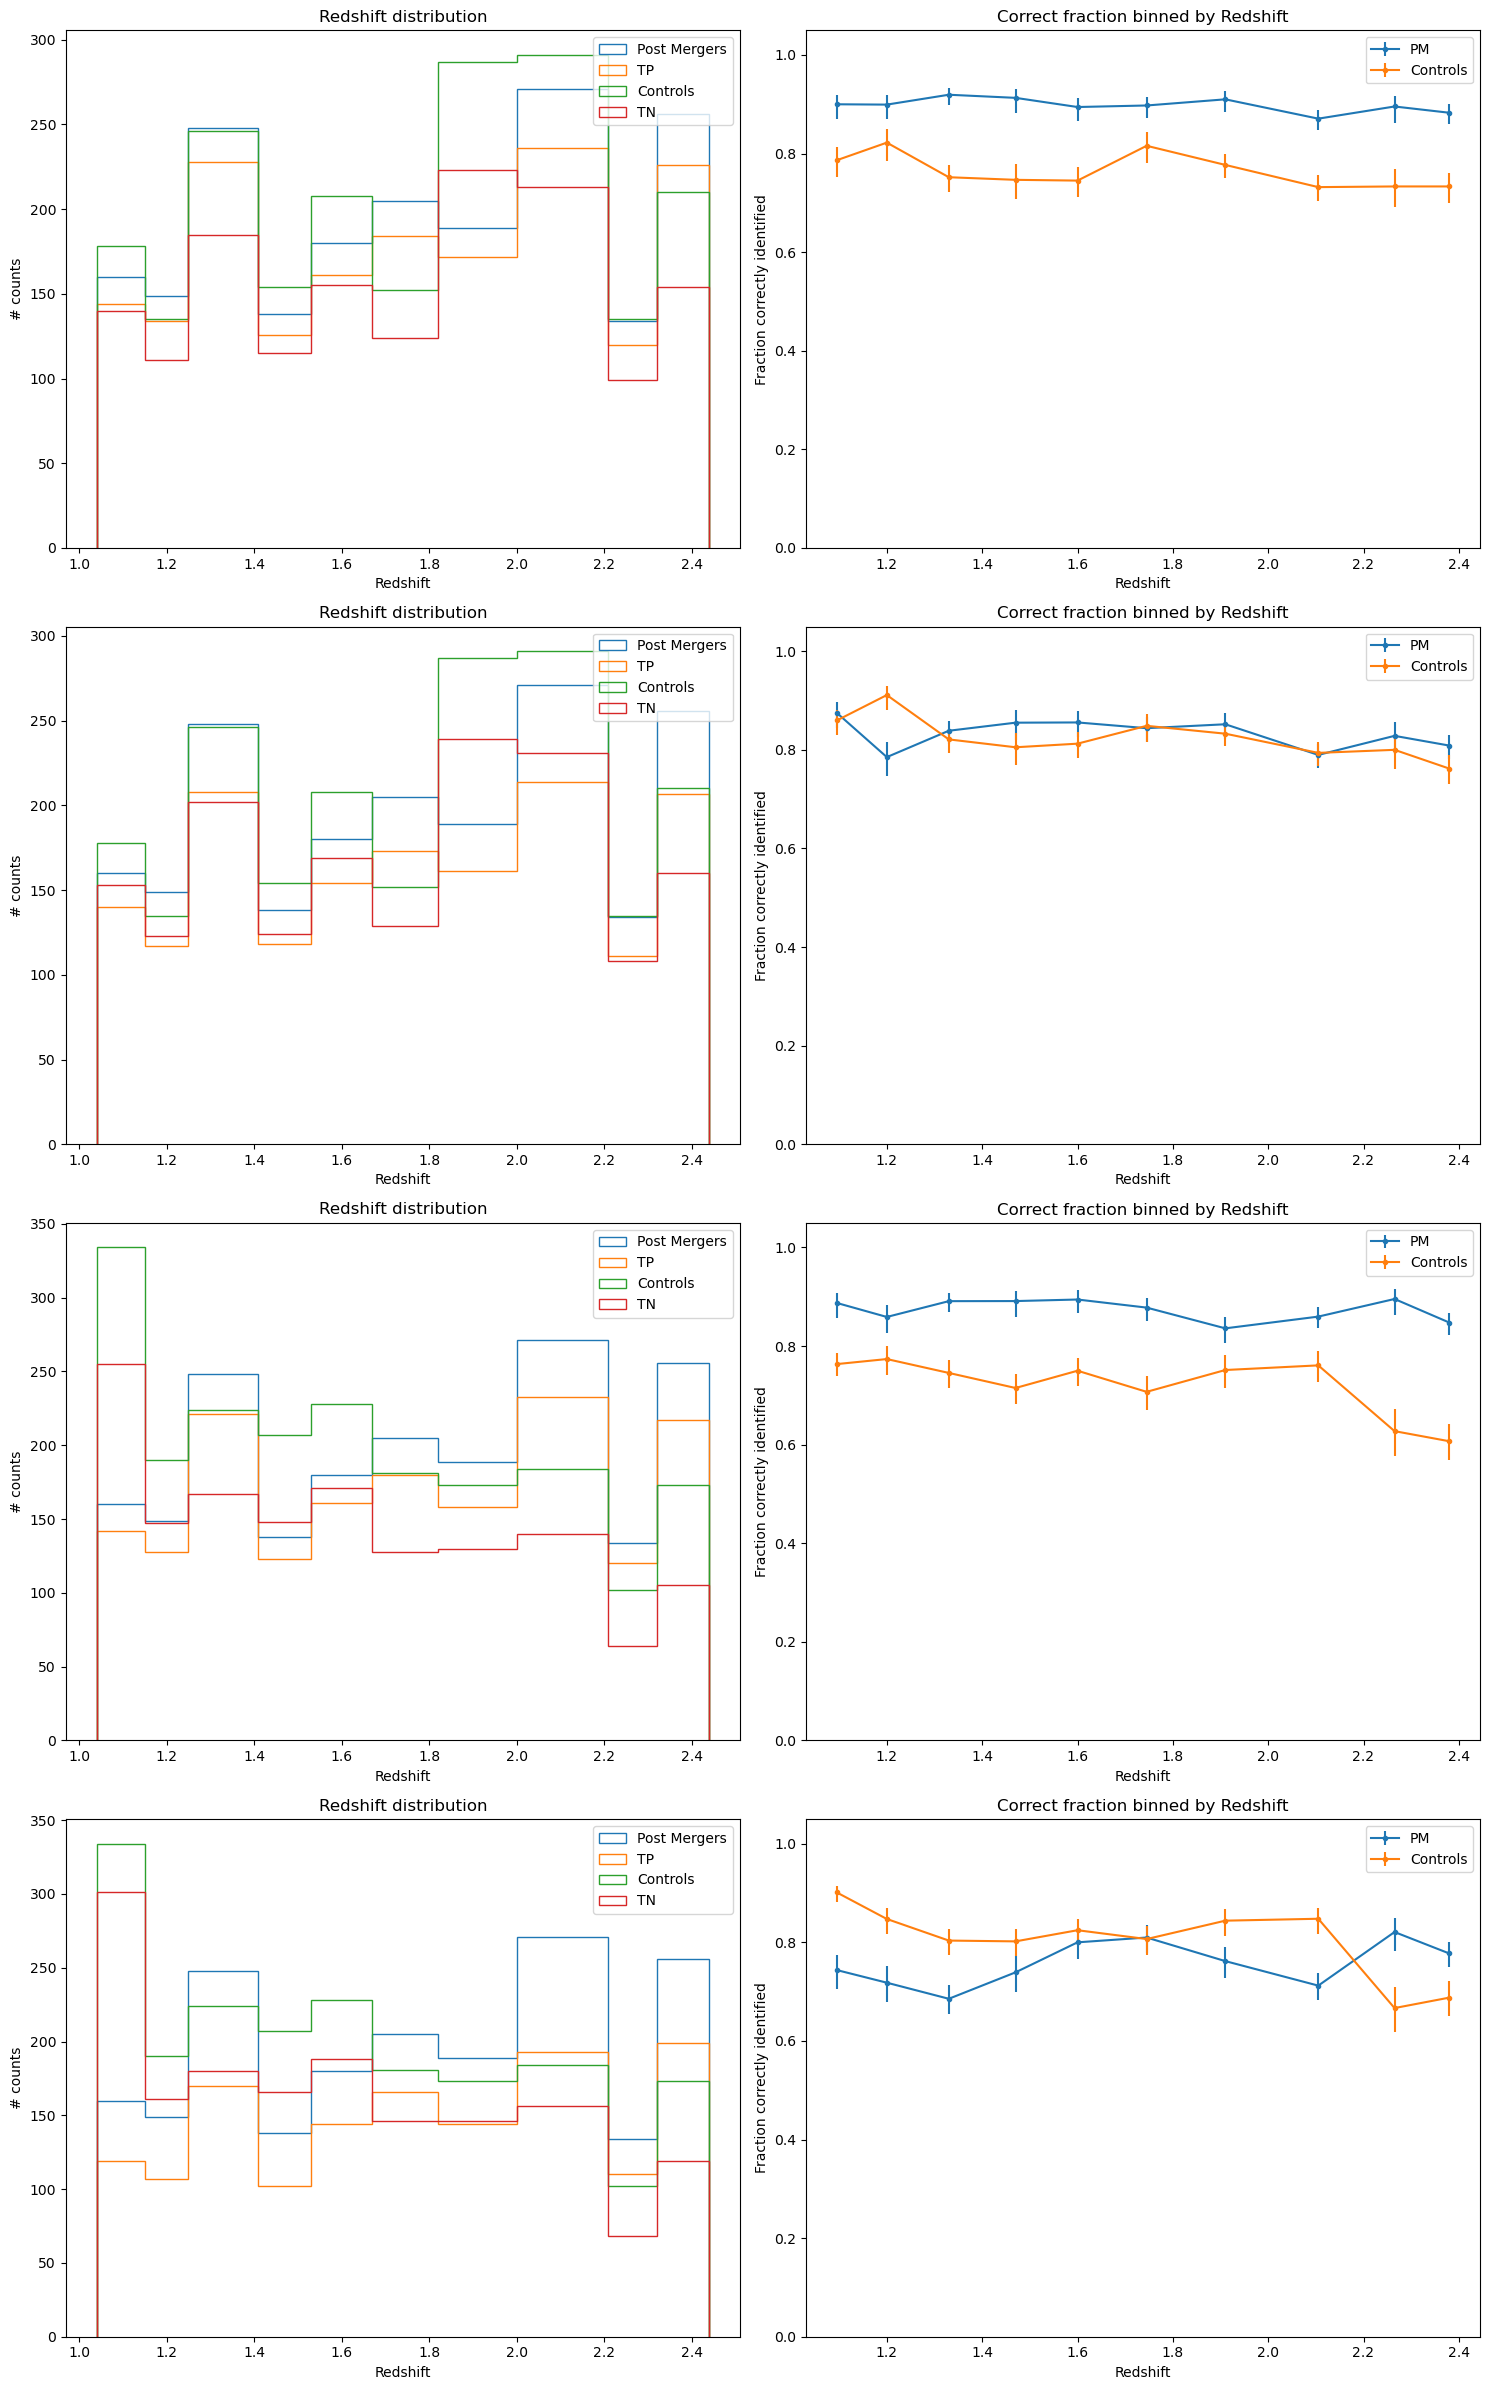

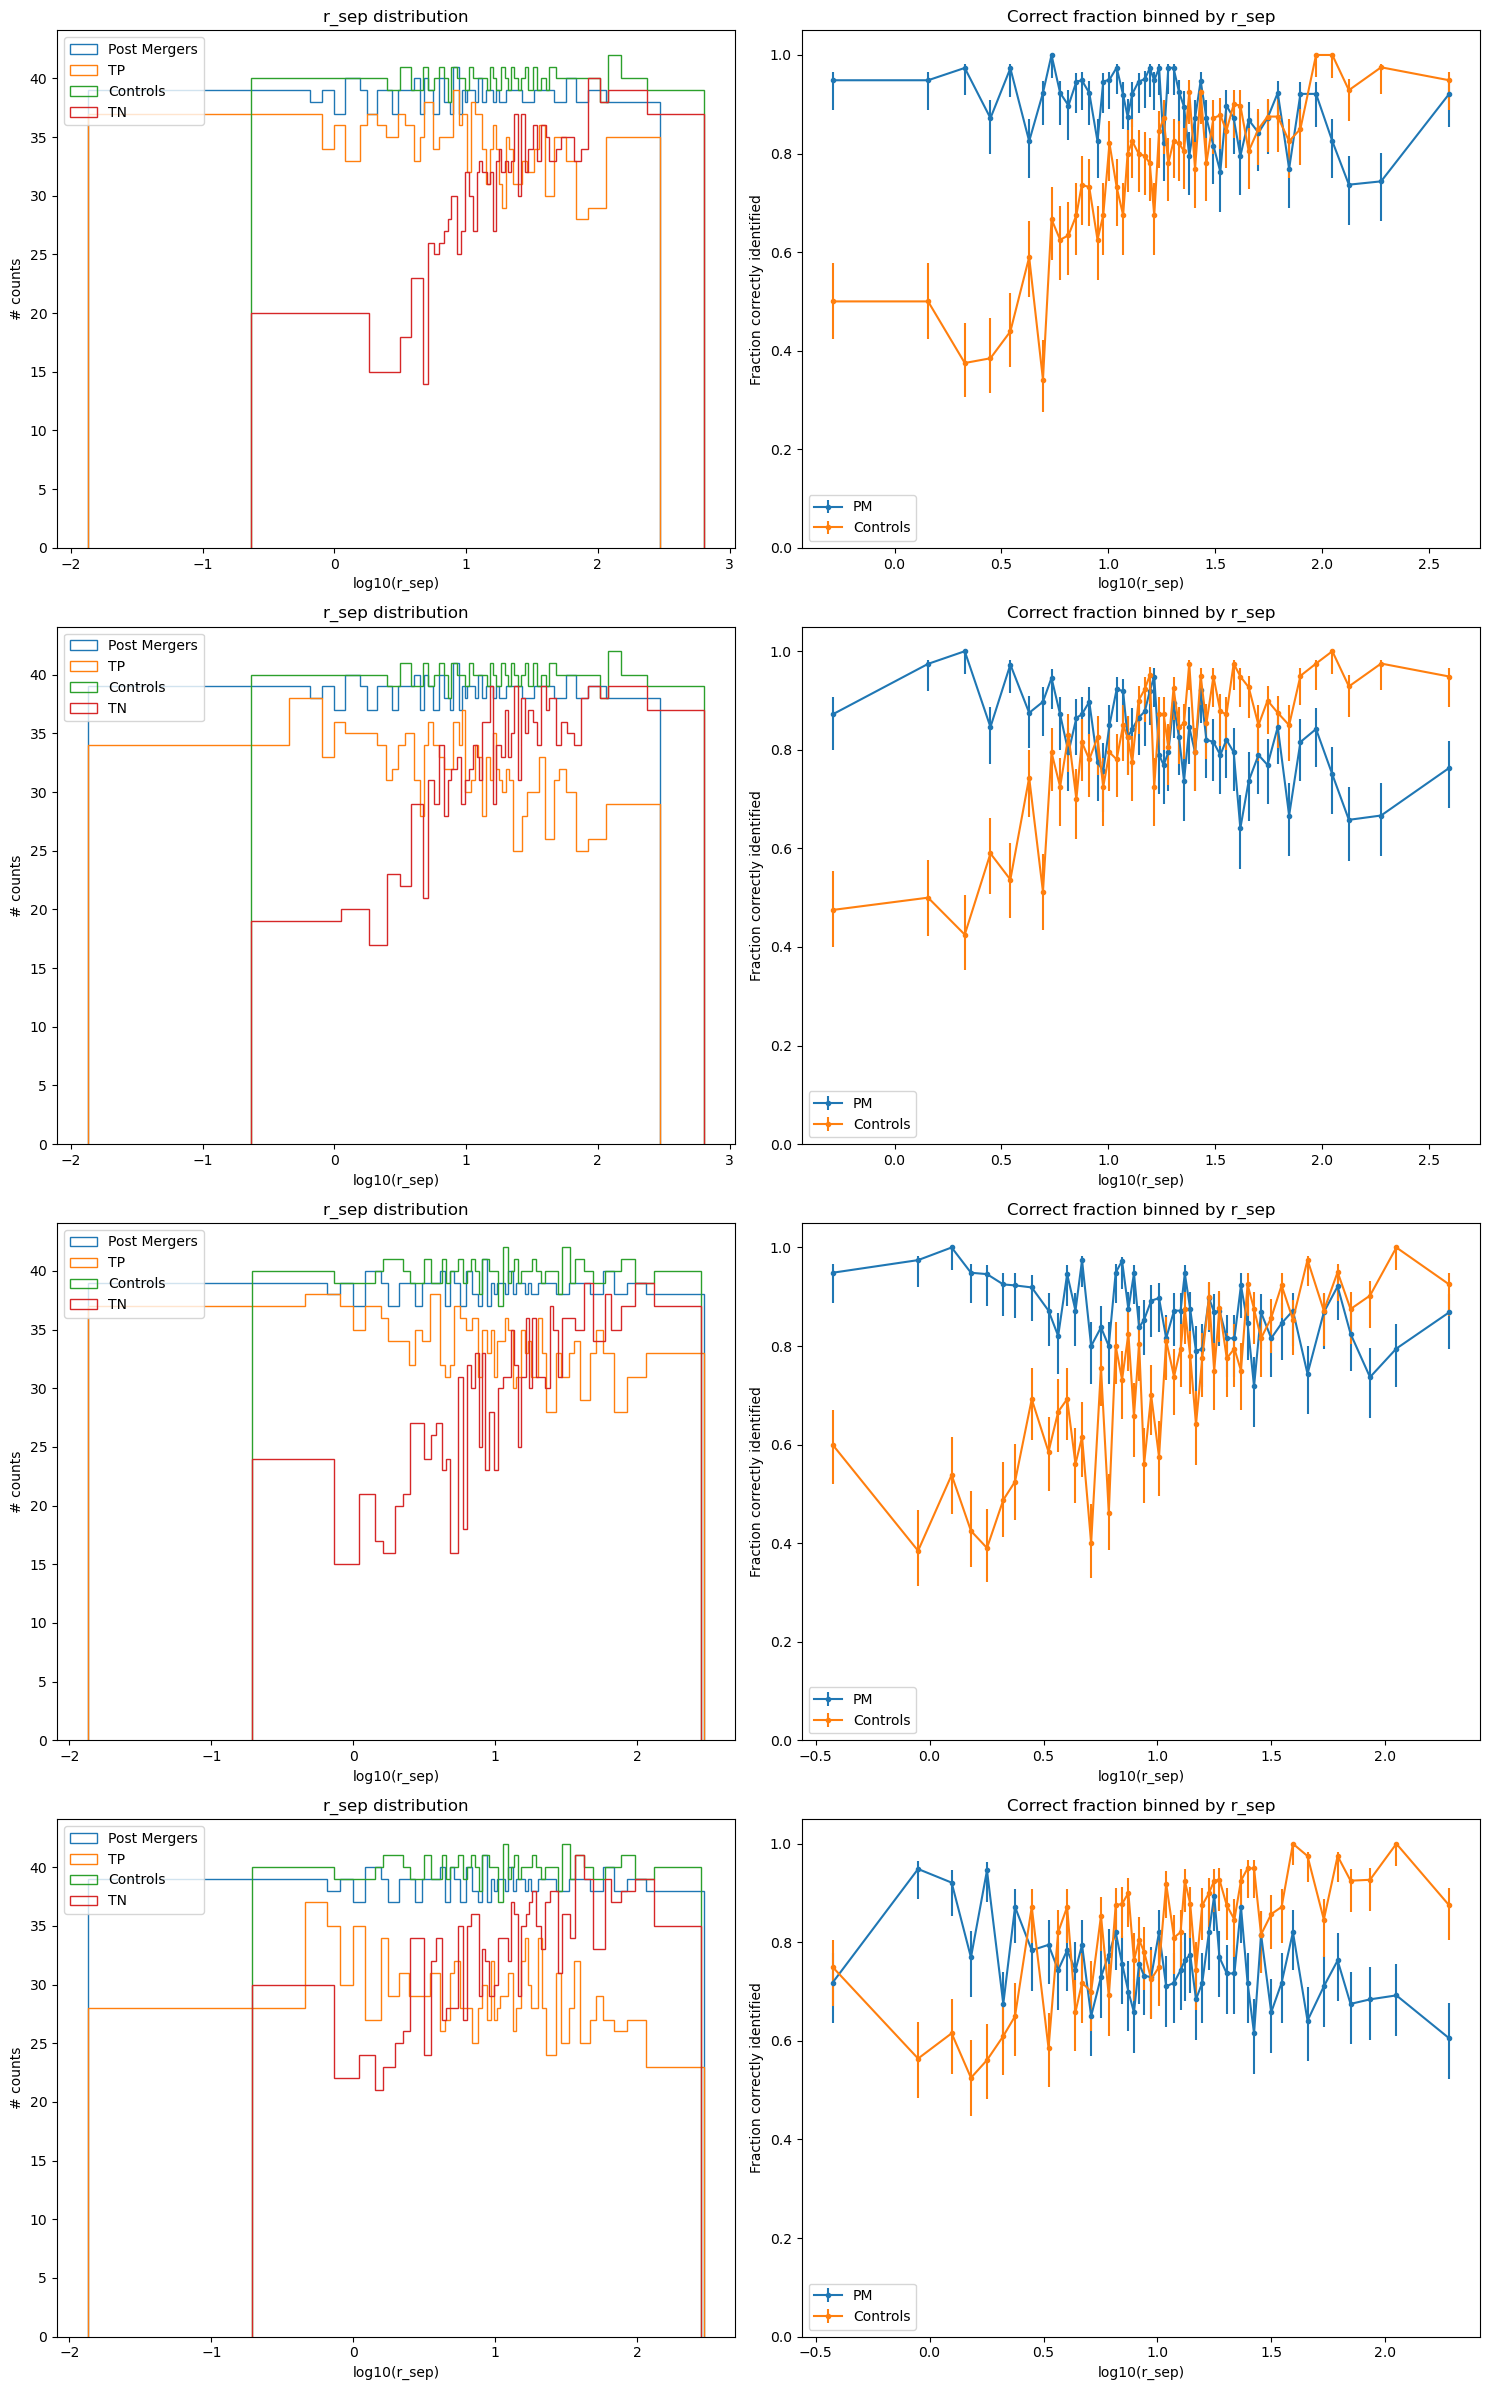

In [19]:
params = ['Mstellar', 'HMRad', 'SFR/Mass', 'Mass/radius**2', 'Redshift', 'r_sep']
no_log = ['Redshift', 'ratio_recent', 'Z', 'ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest','GAS_FRAC']

plot_multi_results(results_list.values(), params, no_log)

In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(run_info)

     RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
135     179        50         75  0.479479   0.304304  0.738854  0.707760   
136     180        50         75  0.539540   0.415415  0.742008  0.700803   
137     181        50         75  0.554555   0.520521  0.777772  0.756227   
138     182        50         50  0.468468   0.383383  0.809526  0.803962   
139     183        50         50  0.479479   0.324324  0.747983  0.717218   
140     184        50         50  0.594595   0.438438  0.806665  0.803060   
141     185        50         50  0.508509   0.346346  0.766906  0.730444   
142     186        50         50  0.446446   0.297297  0.823556  0.823117   
143     187        50         50  0.608609   0.500501  0.827571  0.838027   
144     188        50         50  0.398398   0.256256  0.804625  0.786685   
145     189        50         50  0.088088   0.010010  0.826184  0.842804   

     TRA_LOSS  VAL_LOSS  TEST_SIZE_TRN  TEST_SIZE_VAL  N_PICTURES  \
135  0

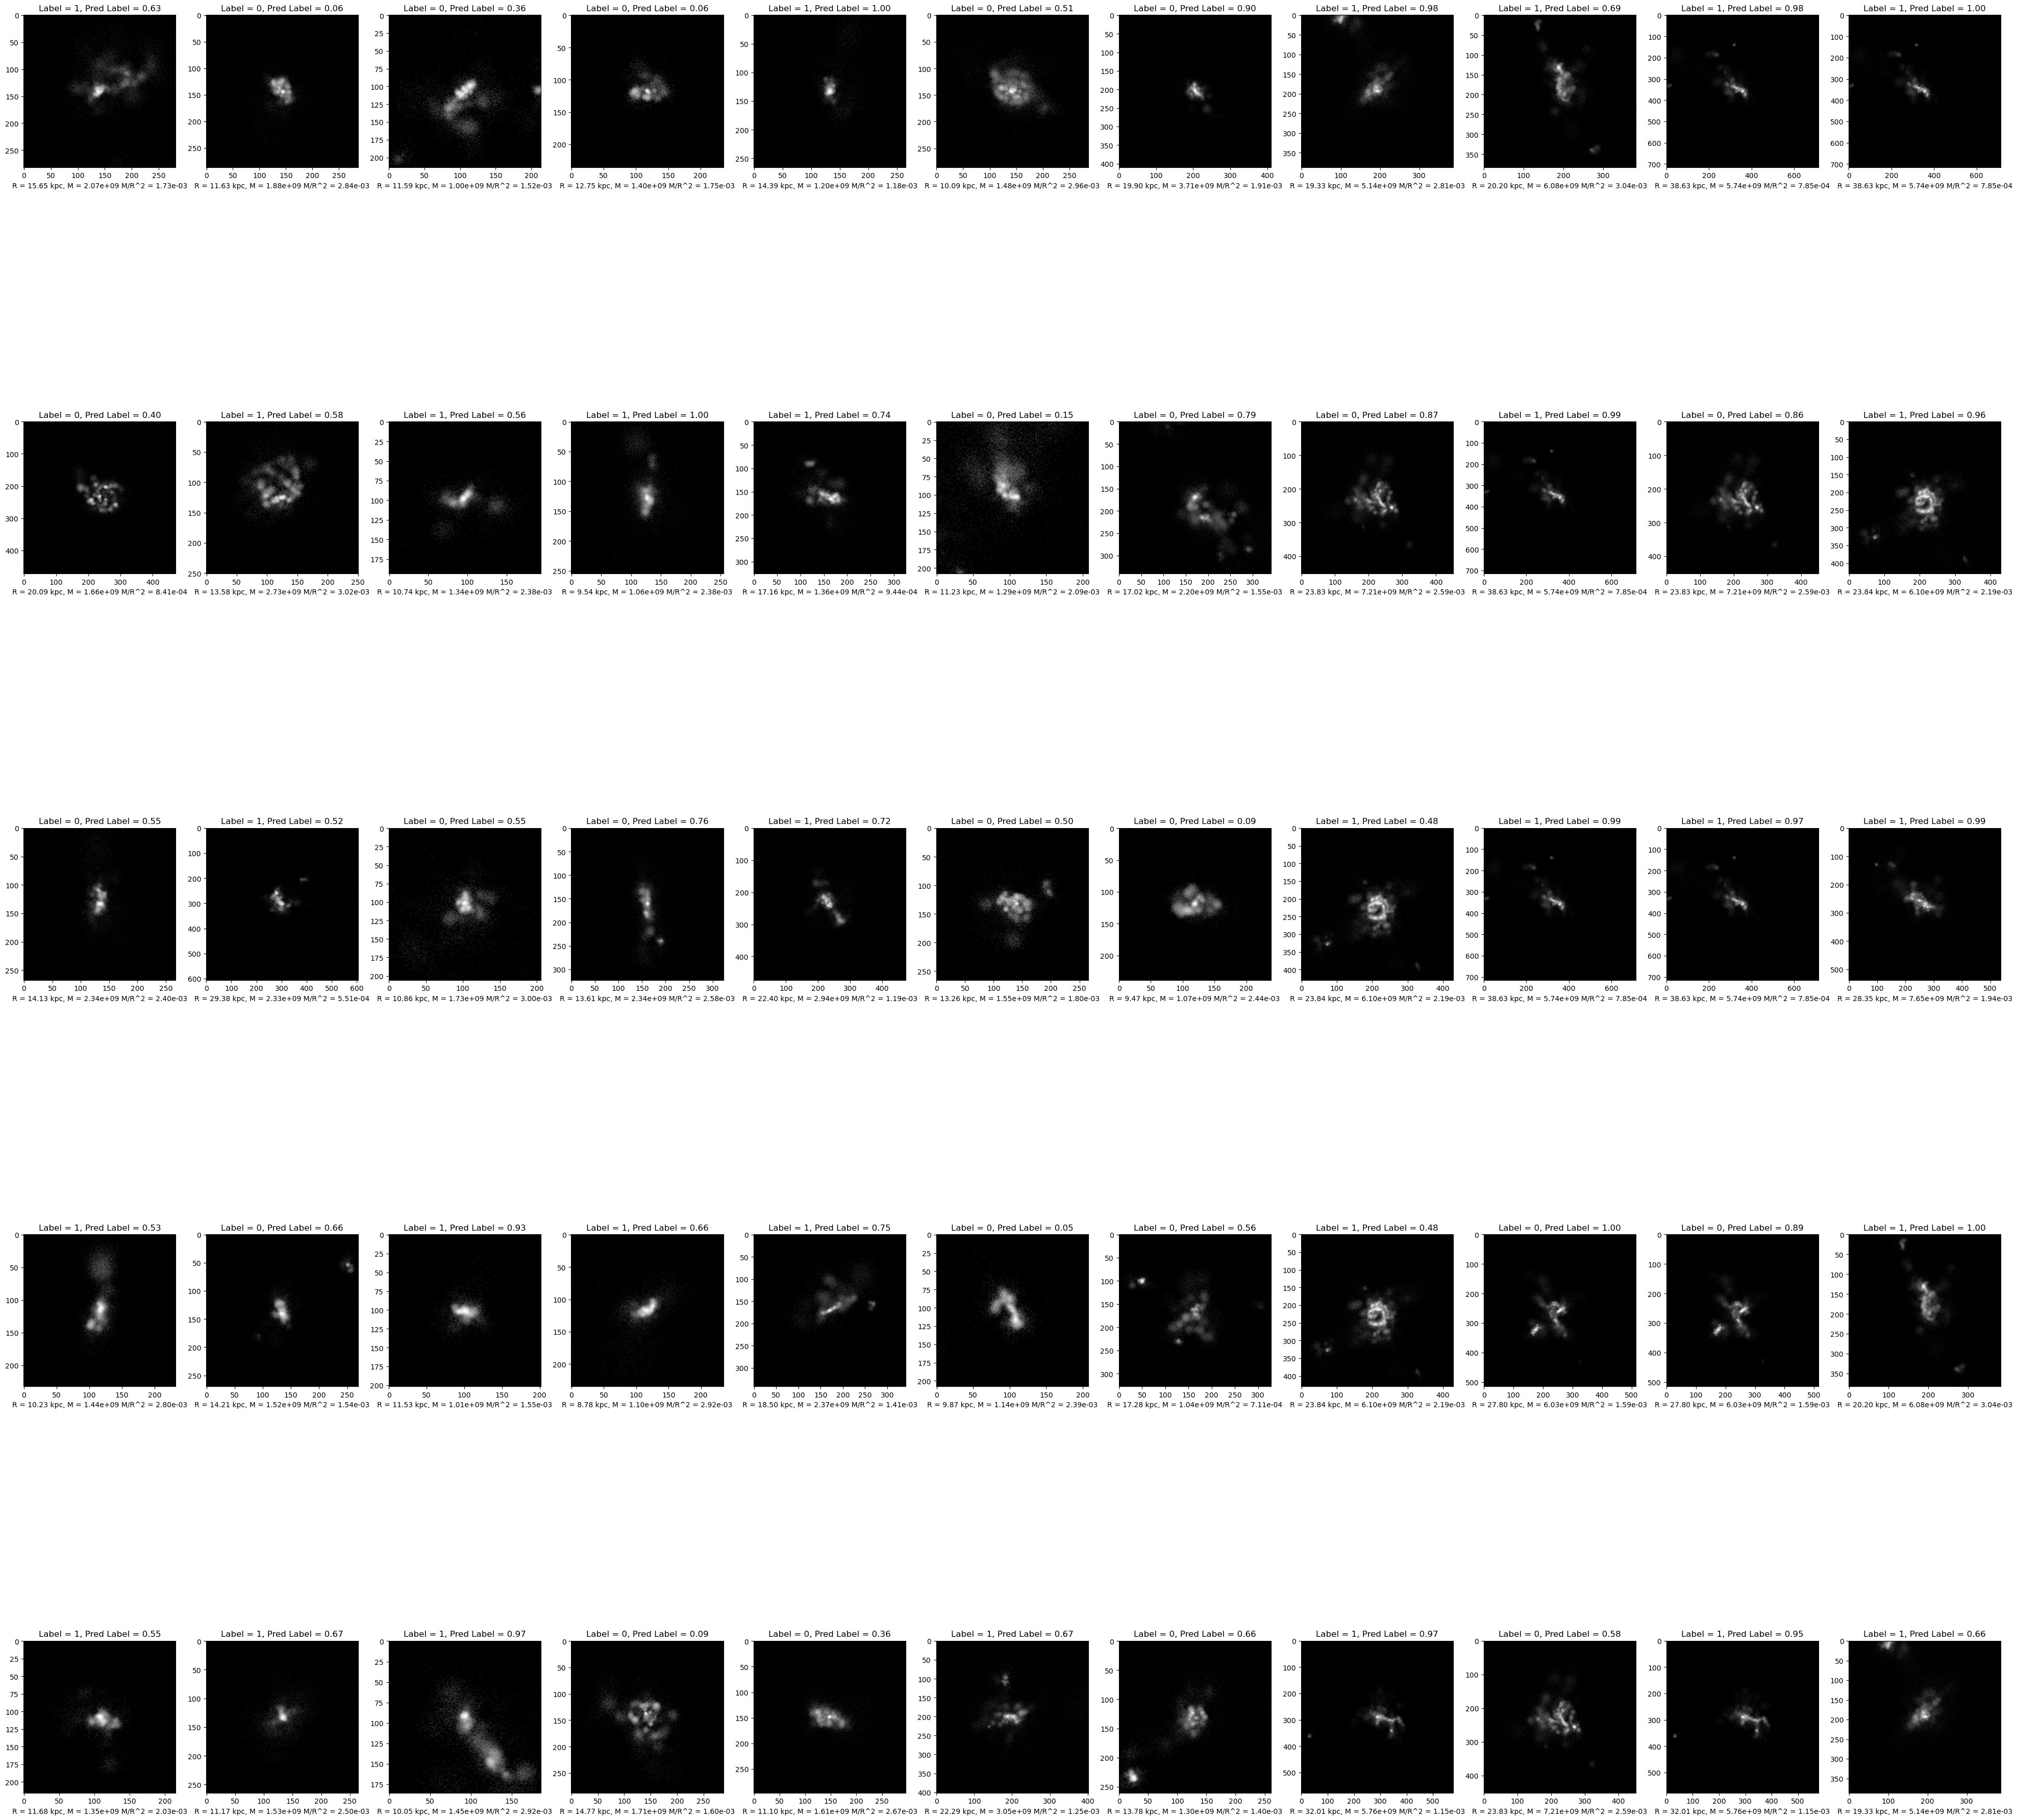

In [24]:
# Plot a few example galaxies from each population

#dfs = [TP, FP, TN, FN]
dfs = results_list.values()

mass_lims_list = [[5, 10], [20, 25], [25, 45], [45, 75]]
hm_rad_lims = [[6.3, 10], [10, 16], [16, 25]]
mass_rad_lims = [[1e-4, 10**-2.5], [1e-4, 10**-2.5], [1e-4, 10**-2.5], [1e-4, 10**-2.5], [1e-4, 10**-2.5]]

fig = plt.figure(figsize = (50,10 * len(mass_rad_lims)))
ax = fig.subplots(len(mass_rad_lims),len(dfs))

for j, mass_rad_lim in enumerate(mass_rad_lims):

    for i, df in enumerate(dfs):
        df_filt = df.loc[(df['Mass/radius**2'] > mass_rad_lim[0]) & (df['Mass/radius**2'] < mass_rad_lim[1])].reset_index(drop = True)
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            ax[j,i].imshow(hdul[3].data[0], cmap = 'gray_r')
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_LABEL'][idx]))
            ax[j,i].set_xlabel('R = %.2f'%(df_filt['HMRad'][idx] / 0.7) + ' kpc, M = %.2e'%(df_filt['Mstellar'][idx] * 1e10) + ' M/R^2 = %.2e' %(df_filt['Mass/radius**2'][idx]))

In [12]:
scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1/0.7, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1e10/((1/0.7)**2), 'SFR/Mass' :1e-10}
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)', 'SFR/Mass':'SFR/Mass'}
title_labels = {0: '(No boosting or HMrad matching)', 1: '(No boosting or HMrad matching)' , 2: '(Boosting and HMrad matching)', 3: '(Boosting and HMrad matching)', 4: '(Boosting + HMrad matching + Higher M cutoff)', 5: '(Boosting + HMrad matching + Higher M cutoff)', 6: '(Boosting + HMrad matching + Higher M cutoff)'}


def plot_multi_results_2(results_list, params, no_log):
    
    fig = plt.figure(figsize = (15,6 * len(results_list)))
    ax = fig.subplots(2*len(results_list),len(params))
    
    fig_avg = plt.figure(figsize = (25,6))
    ax_avg =  fig_avg.subplots(1,len(params))
    
    for j, param in enumerate(params):
        

        
        probs = []
        bins_M_total = {}
        bins_NM_total = {}
        
        for i, results in enumerate(results_list):
            
            if param == 'Edd_ratio':
                results = results.loc[results['Edd_ratio'] > 1e-6]
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[i,j].hist(results.loc[results['LABEL'] == 1][param].values, histedges_equalN(results.loc[results['LABEL'] == 1][param].values, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,j].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,j].hist(results.loc[results['LABEL'] == 0][param].values, bins = edges_M, histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,j].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TN')

            else:
                

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values * scale[param])

                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                
                if (i == 0):
                    bins_M_total[param] = histedges_equalN(results_M_total, 10)
                    bins_NM_total[param] = histedges_equalN(results_NM_total, 10)
                
                counts_M_total, edges_M, bars = ax[i,j].hist(results_M_total, bins_M_total[param], histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,j].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,j].hist(results_NM_total, bins_NM_total[param], histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,j].hist(results_NM, bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for k in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[k]) & (results[param] < edges_M[k + 1])]['PRED_LABEL'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)].loc[(results[param] > edges_M[k]) & (results[param] < edges_M[k + 1])]['PRED_LABEL'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[k]) & (results[param] < edges_M[k + 1])]['PRED_LABEL'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)].loc[(results[param] > edges_M[k]) & (results[param] < edges_M[k + 1])]['PRED_LABEL'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            ax[i,j].set_title(param + ' distribution')
            ax[i,j].set_ylabel('# counts')
            ax[i,j].set_xlabel(xlabels[param])
            ax[i,j].legend()
            
            #probs.append([probs_M_total, probs_M, probs_NM_total, probs_NM, bin_edges])


            centers = 0.5*(edges[1:]+ edges[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            n = i + len(results_list)
            ax[n,j].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[n,j].errorbar(centers, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            probs.append([counts_M/counts_M_total, counts_NM/counts_NM_total])
            
            ax[n,j].set_ylabel('Fraction correctly identified')
            ax[n,j].set_title('Correct fraction binned by ' + param)
            ax[n,j].set_ylim(0, 1.05)
            ax[n,j].set_xlabel(xlabels[param])
            ax[n,j].legend()
            
        probs = np.array(probs)
        avg = np.zeros((2,len(probs[0,0,:])))
        error = np.zeros((2,len(probs[0,0,:])))
        for m in range(len(probs[0,0,:])):
            avg[0, m] = np.sum(probs[:,0,m])/len(probs[:,0,0])
            avg[1, m] = np.sum(probs[:,1,m])/len(probs[:,0,0])
            error[0, m] = np.std(probs[:,0,m])/np.sqrt(len(probs[:,0,0])) * 1.96
            error[1, m] = np.std(probs[:,1,m])/np.sqrt(len(probs[:,0,0])) * 1.96
            
            
        print(avg)
        print(error)
        
        #ax[-1, j].errorbar(centers, avg[0, :], yerr = error[0, :], fmt = '.-')
        #ax[-1, j].errorbar(centers, avg[1, :], yerr = error[1, :], fmt = '.-')
        #ax[-1, j].set_xlabel(xlabels[param])
        #ax[-1,j].set_ylabel('Fraction correctly identified')
        #ax[-1,j].set_title('Average correct fraction binned by ' + param)
        #ax[-1,j].set_ylim(0, 1.05)
                         
        ax_avg[j].errorbar(centers, avg[0, :], yerr = error[0, :], fmt = '.-')
        ax_avg[j].errorbar(centers, avg[1, :], yerr = error[1, :], fmt = '.-')
        ax_avg[j].set_xlabel(xlabels[param])
        ax_avg[j].set_ylabel('Fraction correctly identified')
        ax_avg[j].set_title('Average correct fraction binned by ' + param)
        ax_avg[j].set_ylim(0, 1.05)

        
    fig.tight_layout()
    fig_avg.tight_layout()

[[0.72342621 0.75362319 0.7515528  0.78816199 0.82194617 0.80392157
  0.85139319 0.78089304 0.75851393 0.81573499]
 [0.69971596 0.73584249 0.73588774 0.7935256  0.84260626 0.81919961
  0.7517876  0.71554487 0.6963583  0.76343619]]
[[0.00873908 0.02727206 0.02737251 0.02356037 0.04316862 0.04434598
  0.01513653 0.02825095 0.03094142 0.06301843]
 [0.05838817 0.03495151 0.03928871 0.01251078 0.0191411  0.03686722
  0.02750725 0.02298786 0.0351461  0.05729376]]
[[0.82969886 0.73868313 0.74741201 0.76708075 0.80331263 0.74406605
  0.7494824  0.778125   0.84156379 0.84989648]
 [0.7433753  0.83987281 0.81368587 0.84502239 0.83360561 0.78318335
  0.76300854 0.73069168 0.65270487 0.54733106]]
[[0.04853541 0.02587573 0.01681326 0.01147768 0.01415451 0.00165153
  0.01293893 0.03775704 0.01435327 0.01910553]
 [0.0573034  0.01645913 0.00222394 0.0215306  0.00288367 0.03073543
  0.03628609 0.04165751 0.0607801  0.07462268]]


/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/li

[[0.750258   0.79399586 0.77258567 0.8136646  0.73913043 0.79669763
  0.79192547 0.7505176  0.76501035 0.875129  ]
 [0.75041077 0.74371847 0.81802661 0.83235456 0.83681152 0.81565394
  0.82790805 0.74843379 0.66688672 0.51035695]]
[[0.06704483 0.04259259 0.00761542 0.0282605  0.04617893 0.02069362
  0.02277531 0.02153658 0.01356034 0.03058678]
 [0.02883134 0.03345286 0.03902909 0.0255721  0.03710903 0.00794407
  0.04888463 0.02487194 0.0819804  0.07533155]]
[[0.87925697 0.71339564 0.71413829 0.72463768 0.79503106 0.76293996
  0.8121775  0.85462098 0.83333333 0.75954592]
 [0.50645227 0.72442232 0.82302901 0.84883747 0.86647403 0.81123032
  0.76972495 0.74817722 0.71236818 0.74602294]]
[[0.01786404 0.01727015 0.0214699  0.03447286 0.02241088 0.0082833
  0.04303497 0.03644657 0.02757231 0.06873226]
 [0.0999874  0.04571242 0.00852763 0.03418409 0.00884926 0.03446282
  0.03818853 0.06067567 0.02866035 0.02846141]]


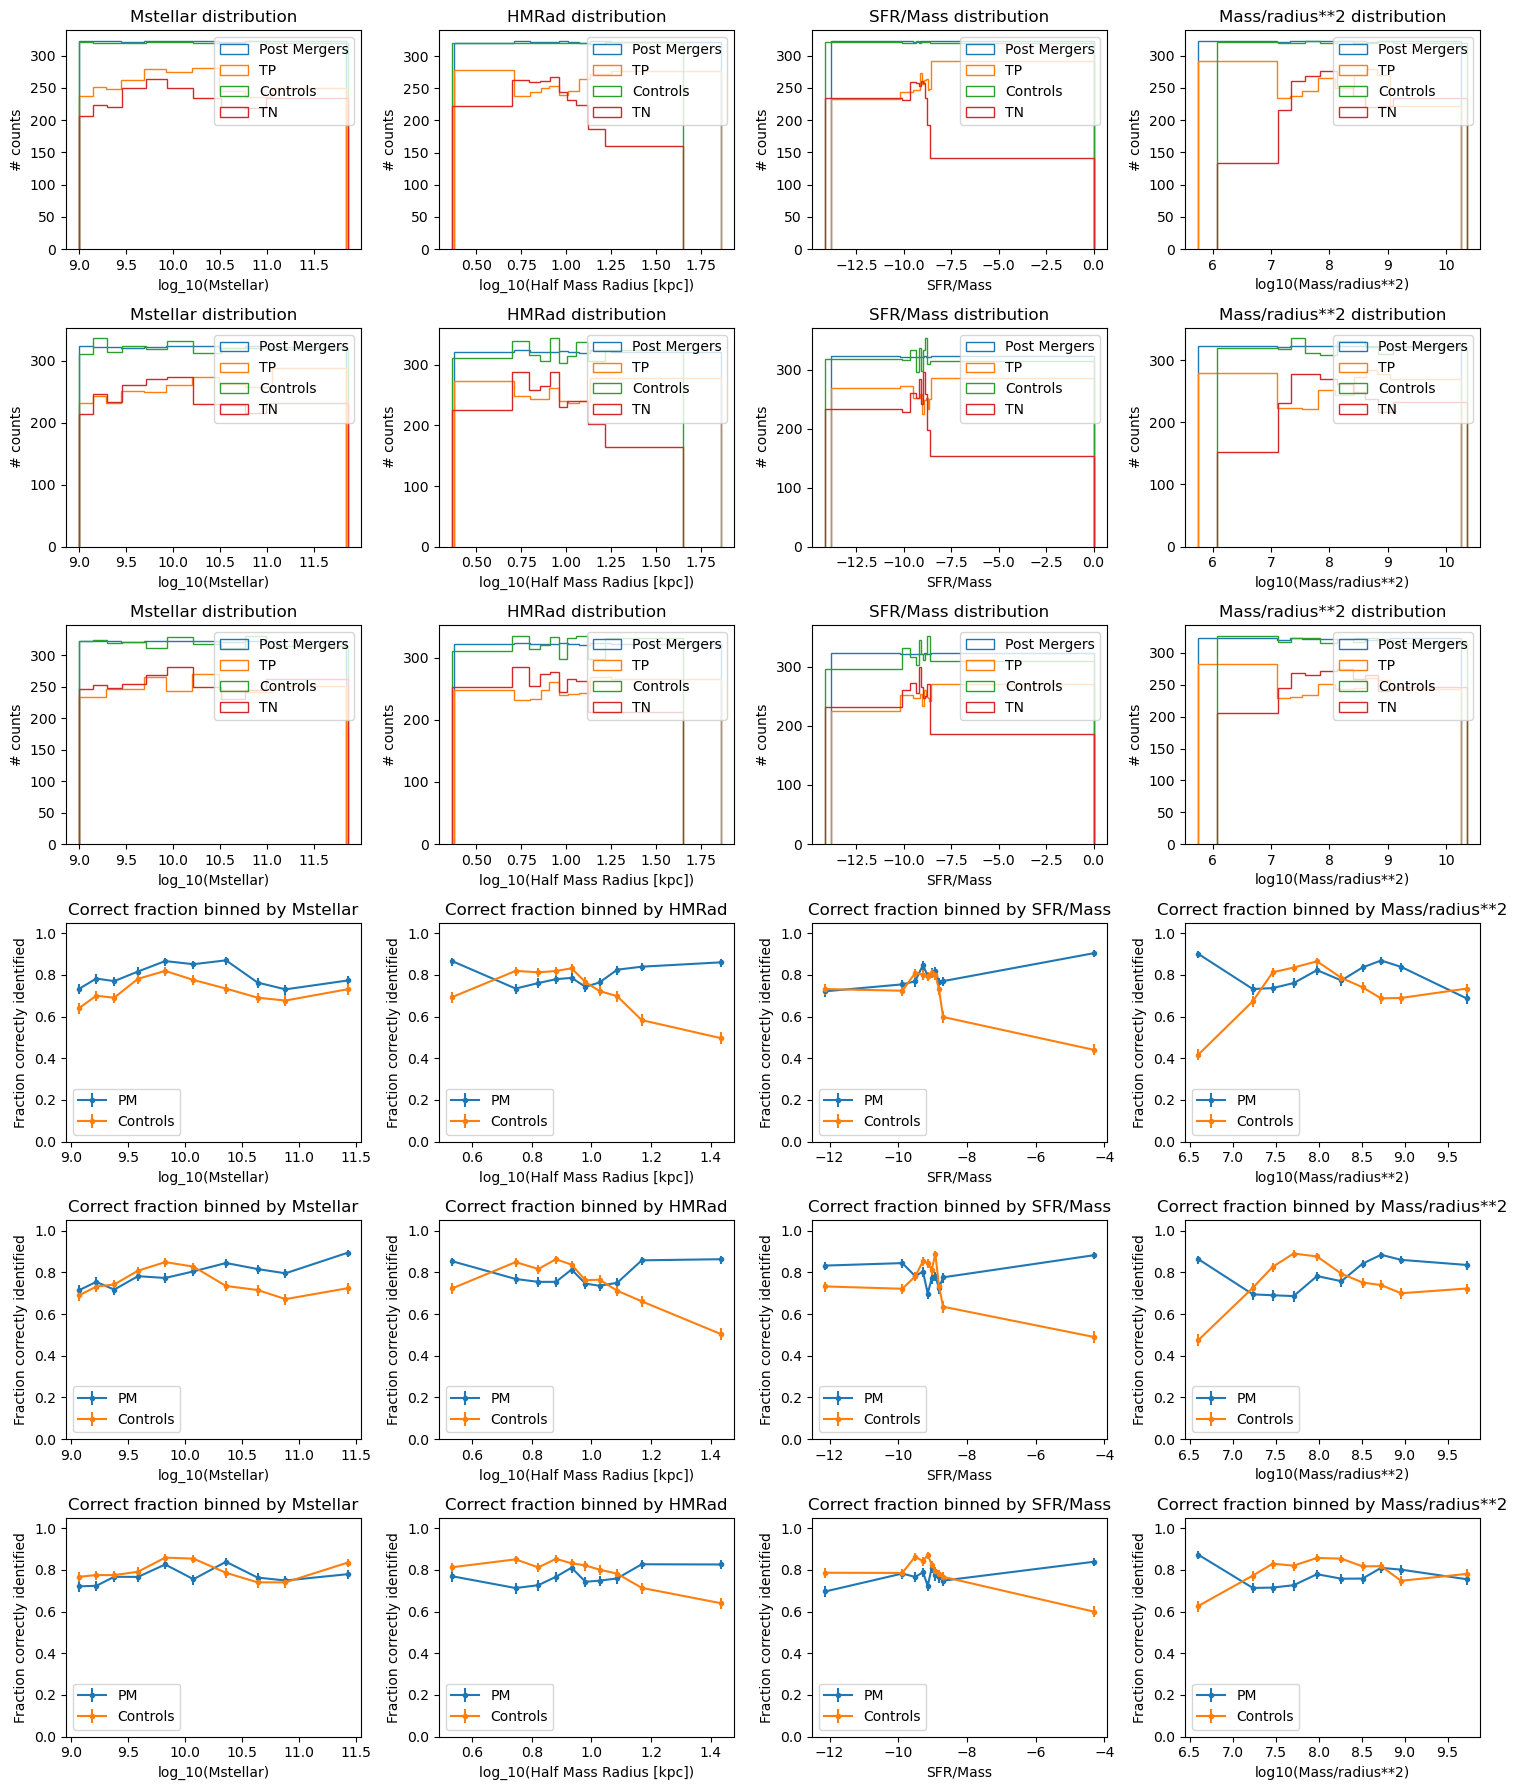

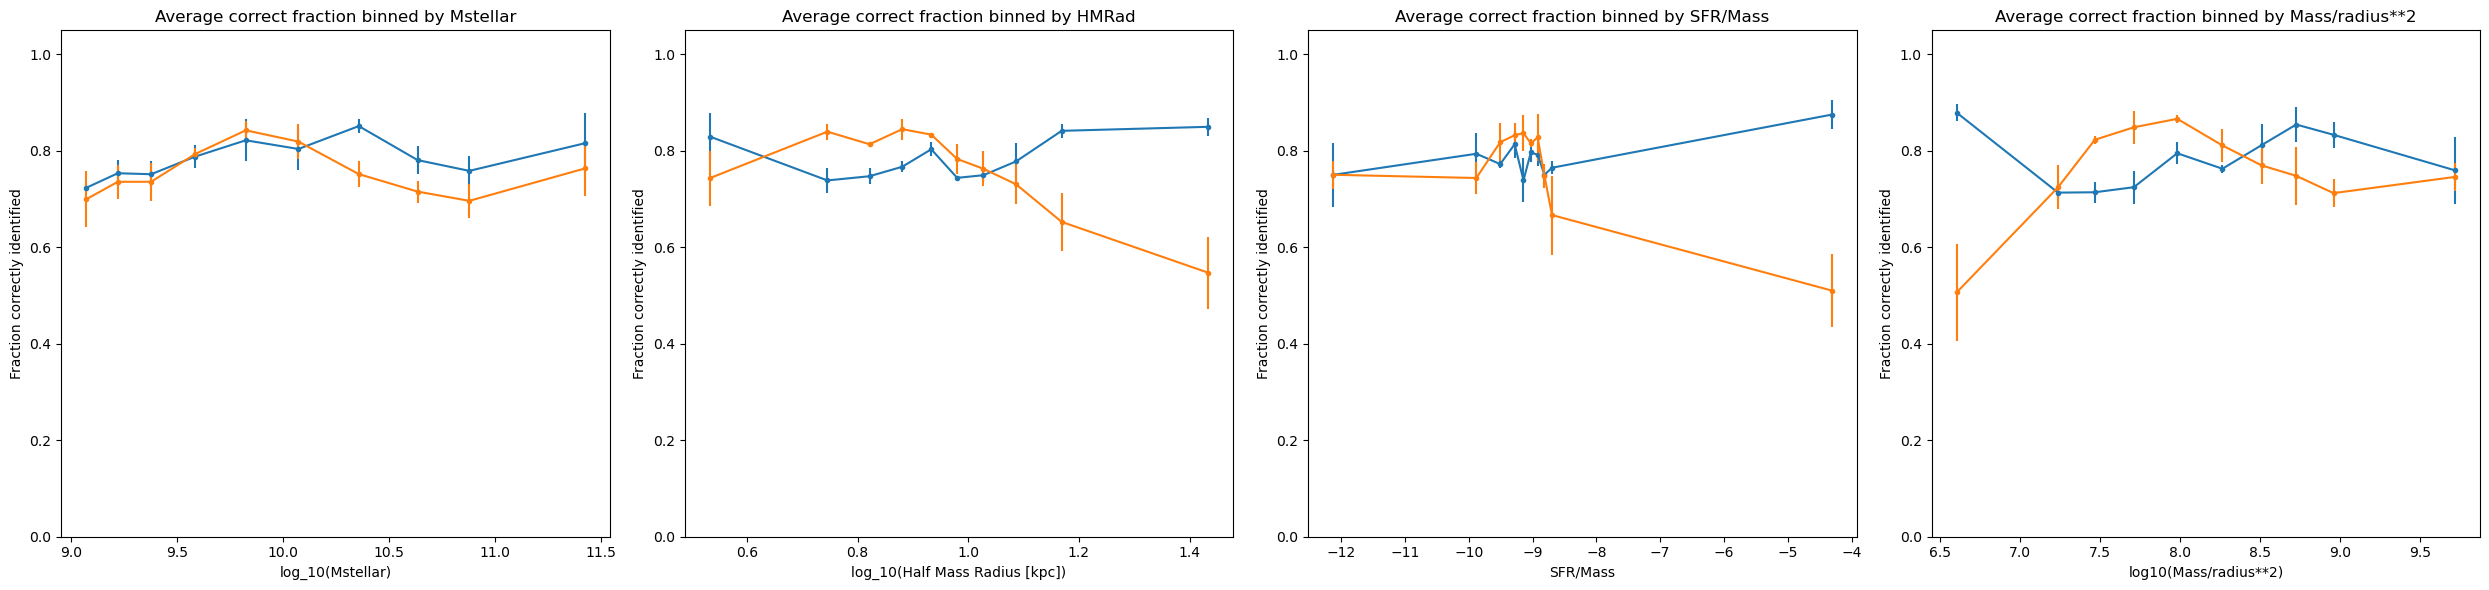

In [13]:
plot_multi_results_2(results_list.values(), params, no_log)

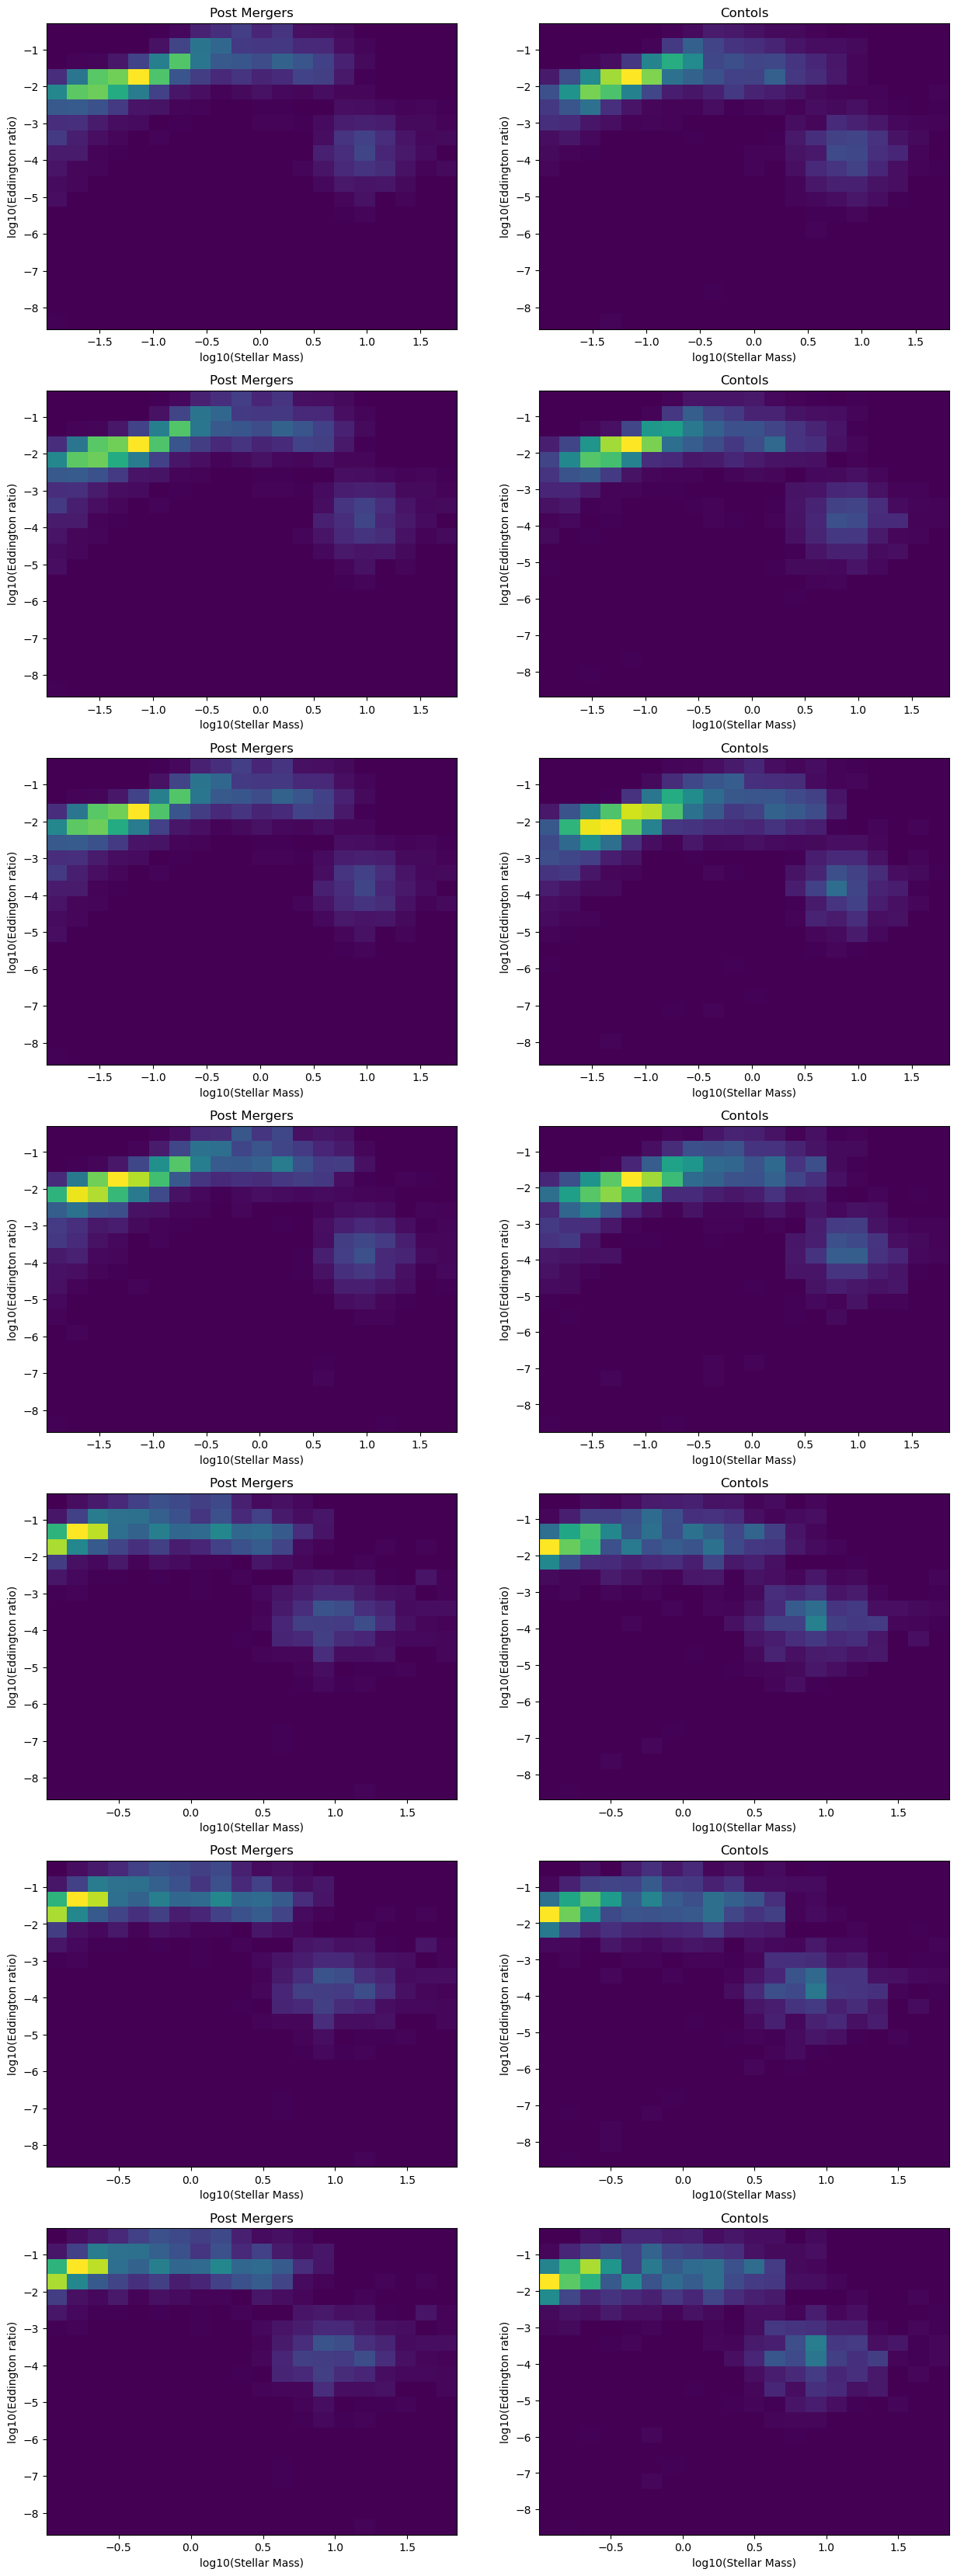

In [92]:
fig = plt.figure(figsize = (15, 6 * len(results_list.values())))
ax = fig.subplots(len(results_list.values()), 2)
for i, results in enumerate(results_list.values()):
    mergers = results.loc[(results['LABEL'] == 1) & (results['Edd_ratio'] > 0)]
    controls = results.loc[(results['LABEL'] == 0) & (results['Edd_ratio'] > 0)]
    ax[i, 0].hist2d(np.log10(mergers.Mstellar), np.log10(mergers.Edd_ratio), bins = 20)
    ax[i, 1].hist2d(np.log10(controls.Mstellar), np.log10(controls.Edd_ratio), bins = 20)
    ax[i, 0].set_title('Post Mergers')
    ax[i, 1].set_title('Contols')
    for axs in ax[i,:]:
        axs.set_xlabel('log10(Stellar Mass)')
        axs.set_ylabel('log10(Eddington ratio)')

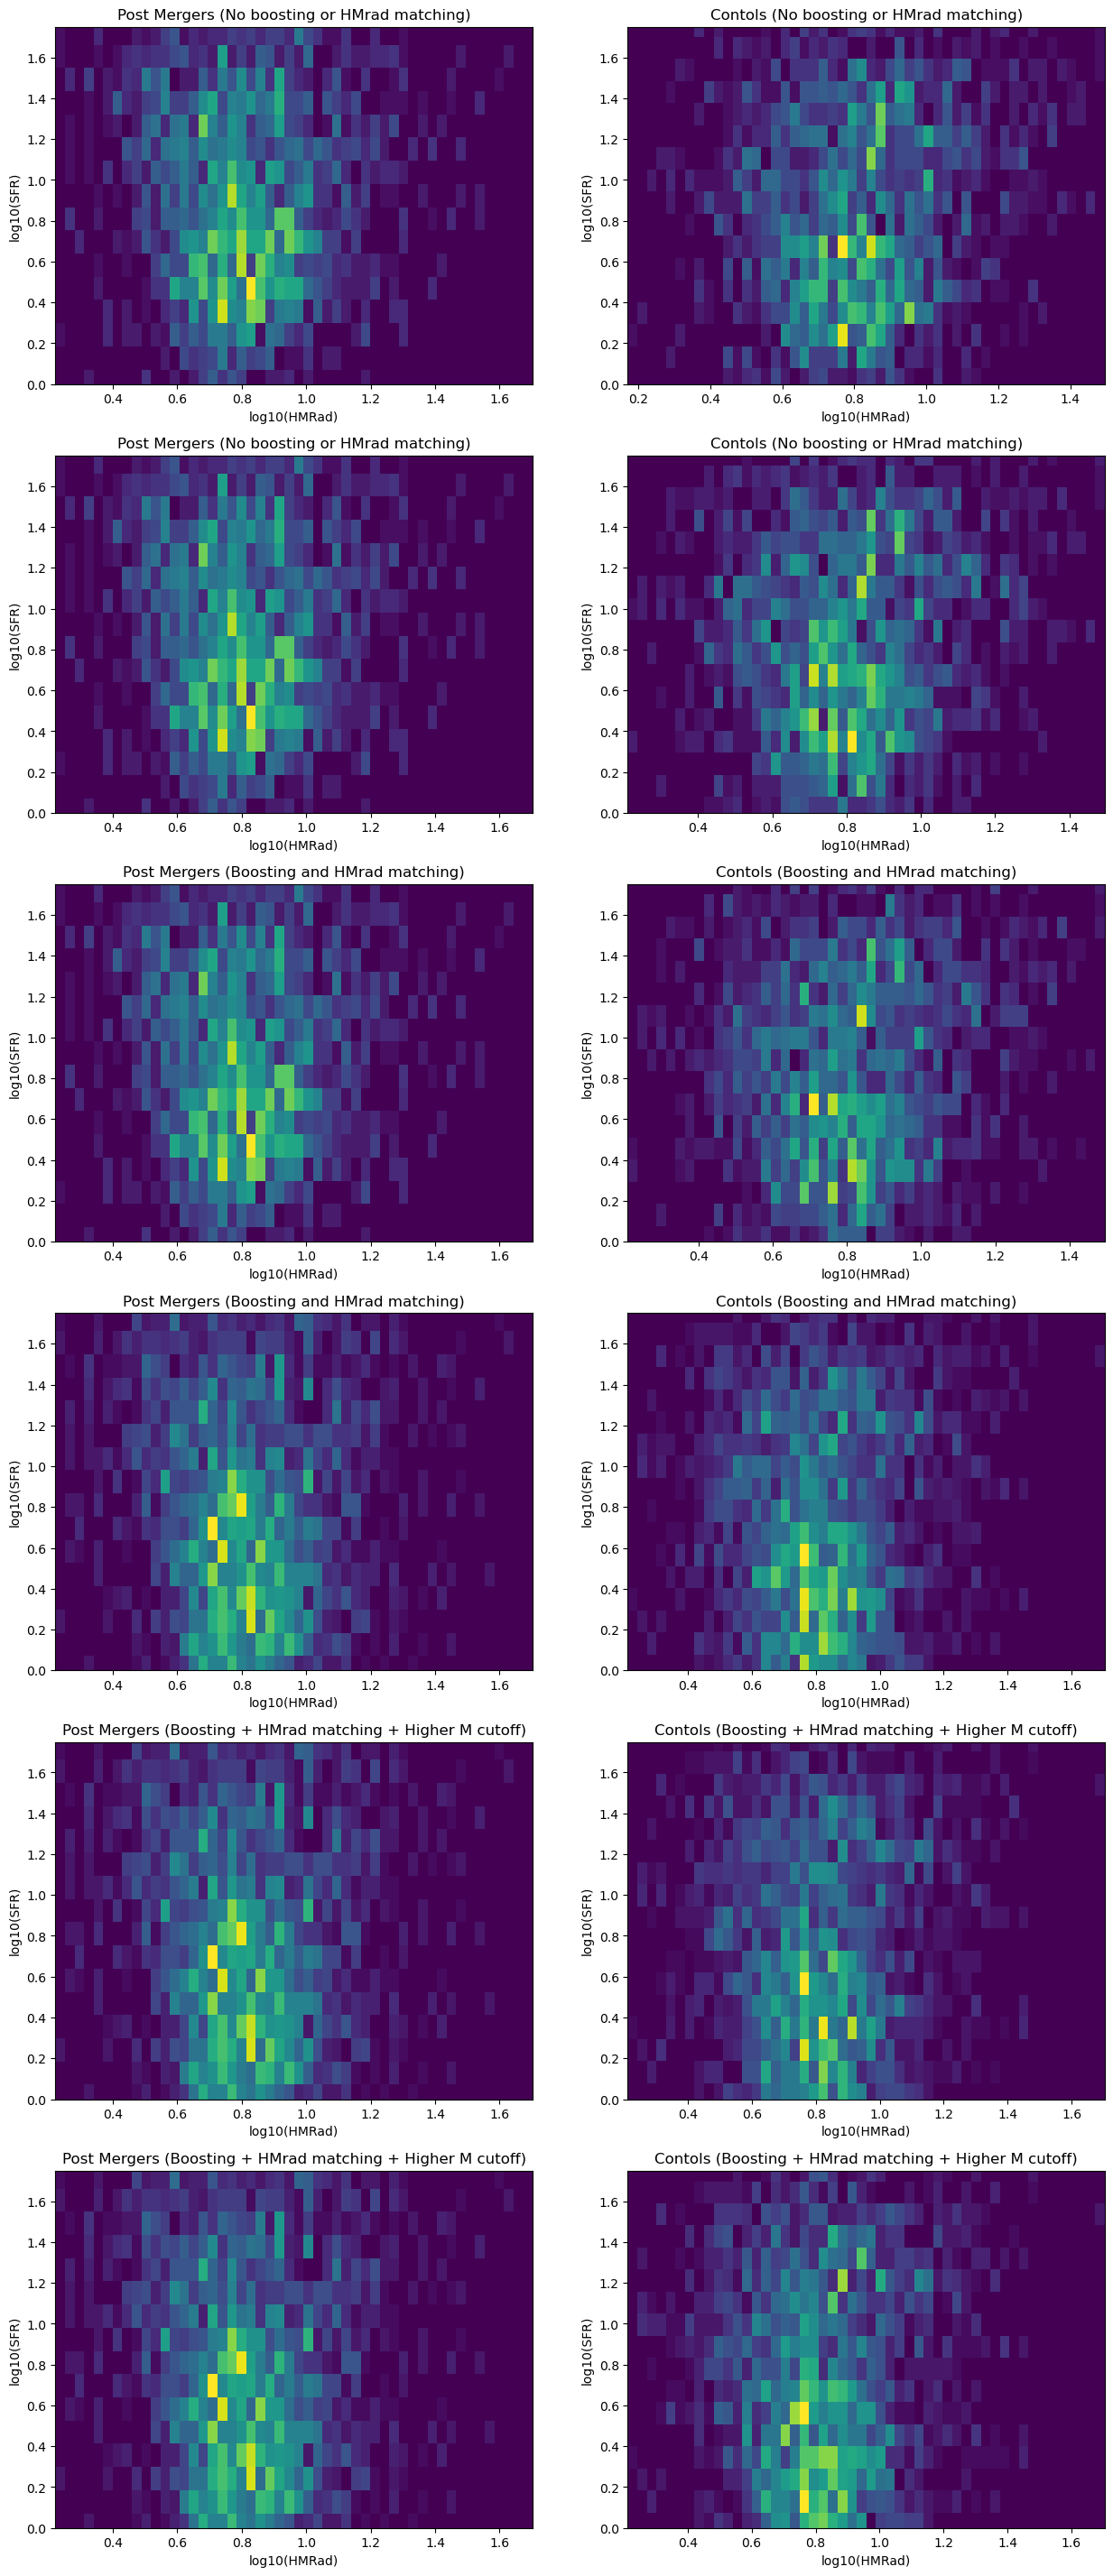

In [61]:
fig = plt.figure(figsize = (15, 6 * len(results_list.values())))
ax = fig.subplots(len(results_list.values()), 2)

param1 = 'HMRad'
param2 = 'SFR'

for i, results in enumerate(results_list.values()):
    results = results.loc[(results['SFR'] > 0)]
    
    mergers = results.loc[(results['LABEL'] == 1)]
    controls = results.loc[(results['LABEL'] == 0)]
    ax[i, 0].hist2d(np.log10(mergers[param1]), np.log10(mergers[param2]), bins = 50)
    ax[i, 1].hist2d(np.log10(controls[param1]), np.log10(controls[param2]), bins = 50)
    ax[i, 0].set_title('Post Mergers ' + title_labels[i])
    ax[i, 1].set_title('Contols ' + title_labels[i])
    for axs in ax[i,:]:
        axs.set_xlabel('log10(' + param1 + ')')
        axs.set_ylabel('log10(' + param2 + ')')
        axs.set_ylim(0, 1.75)

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


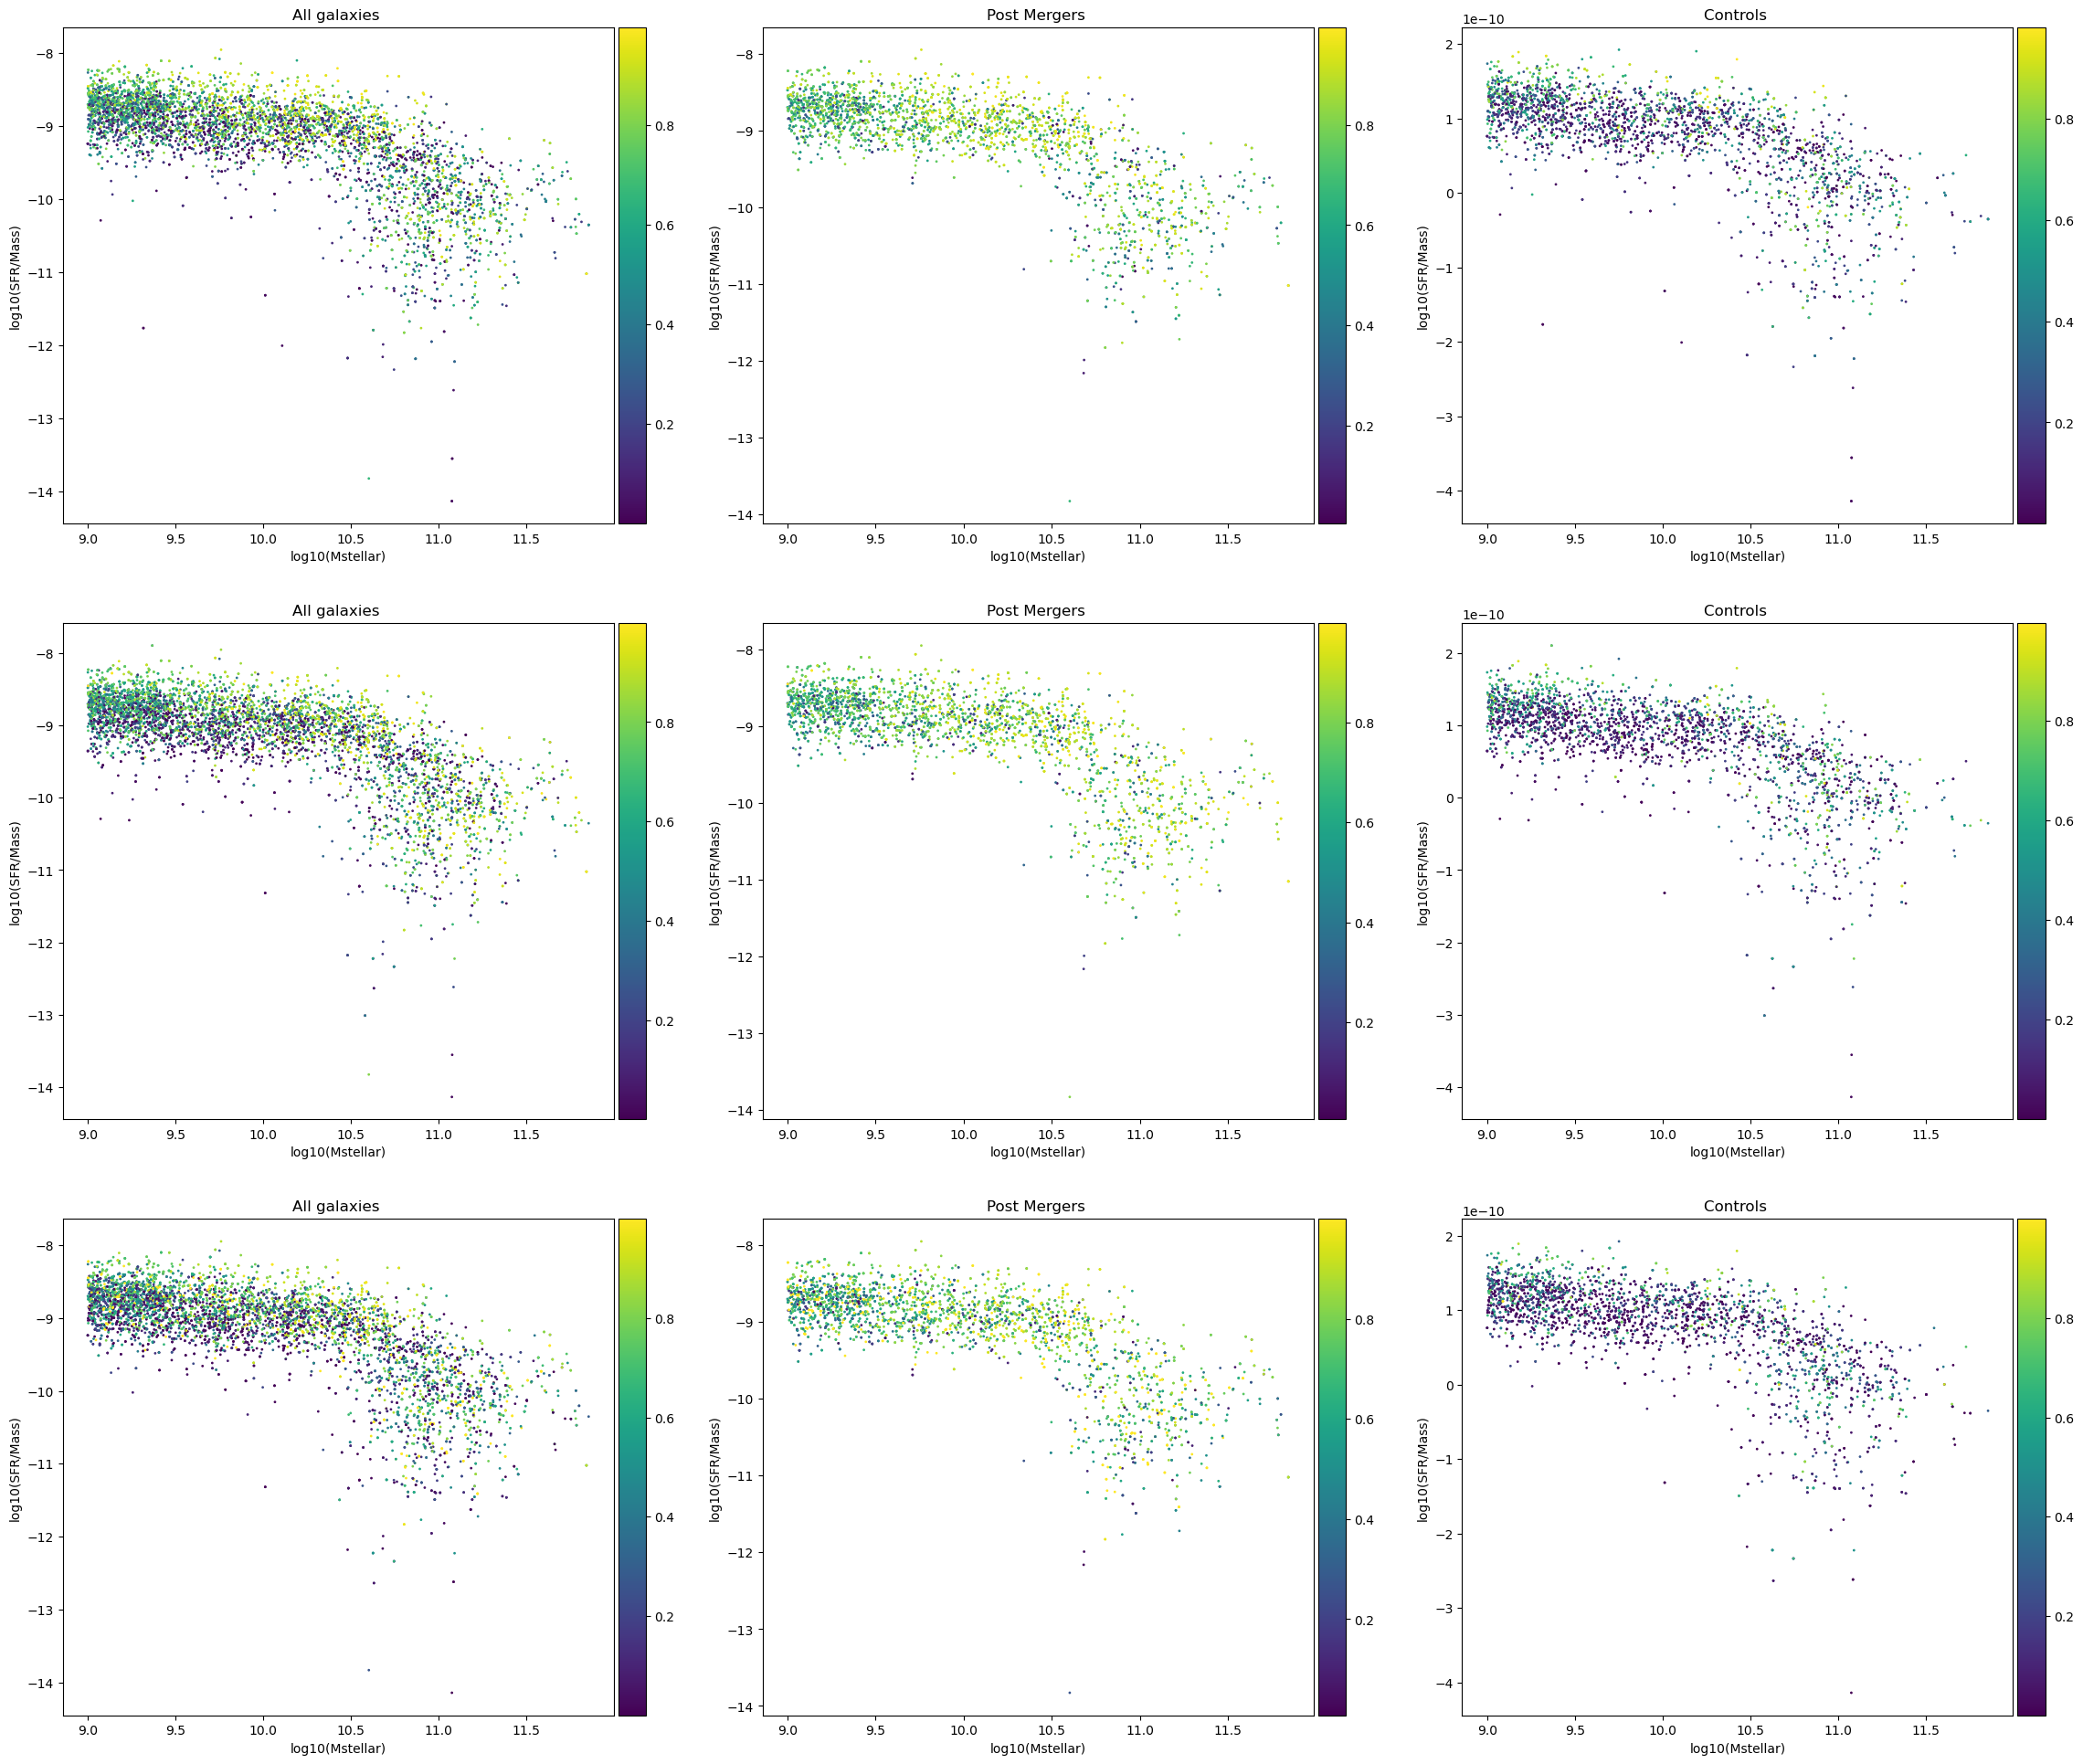

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (28, 8 * len(results_list.values())))
ax = fig.subplots(len(results_list.values()), 3)

param1 = 'Mstellar'
param2 = 'SFR/Mass'



for i, results in enumerate(results_list.values()):
    
    mergers = results.loc[(results['LABEL'] == 1)]
    controls = results.loc[(results['LABEL'] == 0)]
    
    
    colour = [results['PRED_LABEL'], mergers['PRED_LABEL'], controls['PRED_LABEL']]
    #colour = [np.log10(results['SFR/Mass']), np.log10(mergers['SFR/Mass']), np.log10(controls['SFR/Mass'])]
    
    plt1 = ax[i, 0].scatter(np.log10(results[param1] * scale[param1]), np.log10(results[param2] * scale[param2]), s=1, c = colour[0])
    plt2 = ax[i, 1].scatter(np.log10(mergers[param1]* scale[param1]), np.log10(mergers[param2]* scale[param2]), s=1, c = colour[1])
    plt3 = ax[i, 2].scatter(np.log10(controls[param1]* scale[param1]), np.log10(controls[param2])* scale[param2], s=1, c = colour[2])
    ax[i, 0].set_title('All galaxies ')
    ax[i, 1].set_title('Post Mergers ')
    ax[i, 2].set_title('Controls ')
    for axs, plt in zip(ax[i,:], [plt1, plt2, plt3]):
        axs.set_xlabel('log10(' + param1 + ')')
        axs.set_ylabel('log10(' + param2 + ')')
        #axs.set_ylim(0, 2)
        divider = make_axes_locatable(axs)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(plt, cax=cax, orientation='vertical')

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


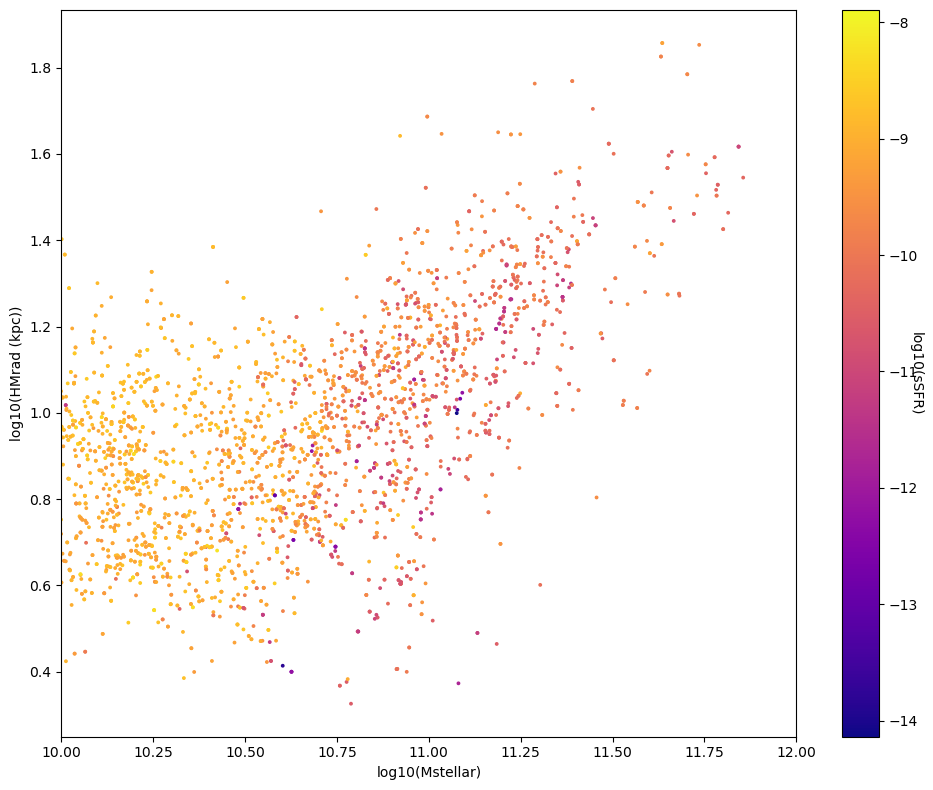

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 8))
param1 = 'Mstellar'
param2 = 'HMRad'
results = results_list[209]
plt.scatter(np.log10(results[param1] * scale[param1]), np.log10(results[param2] * scale[param2]), s=3, c = np.log10(results['SFR/Mass'] * 1e-10), cmap = 'plasma')

plt.xlabel('log10(Mstellar)')
plt.ylabel('log10(HMrad (kpc))')
plt.xlim(10,12)

cbar = plt.colorbar()
cbar.set_label('log10(sSFR)', rotation=270)
plt.tight_layout()


/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


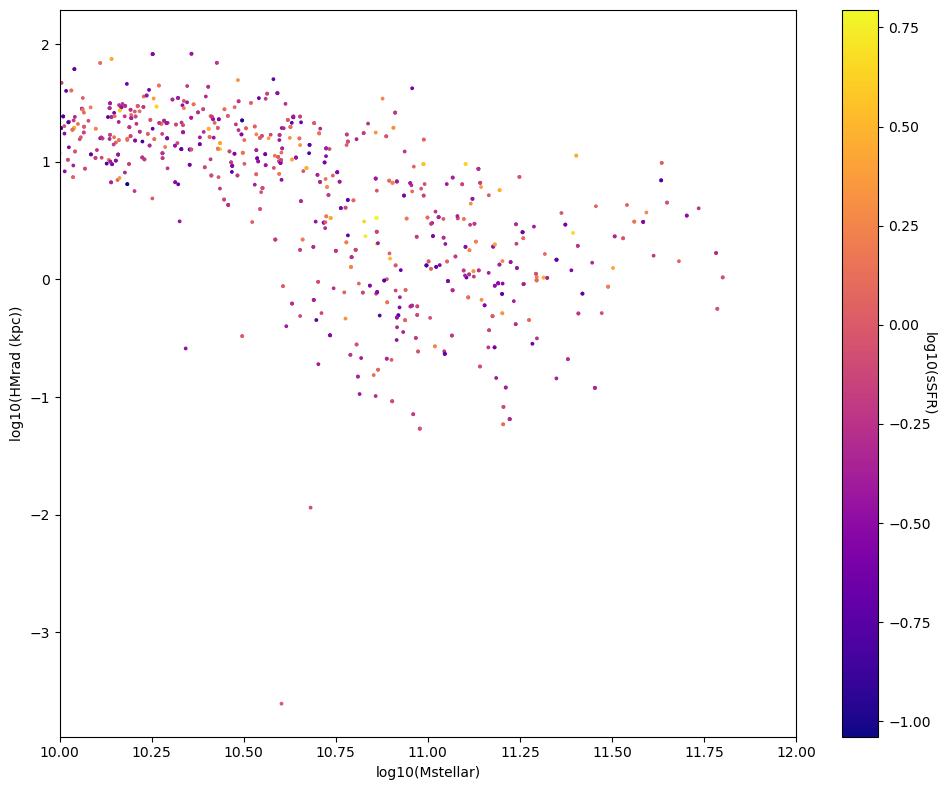

In [13]:
fig = plt.figure(figsize = (10, 8))
param1 = 'Mstellar'
param2 = 'SFR/Mass'

results = results_list[178]

mergers = results.loc[(results['LABEL'] == 1)]
plt.scatter(np.log10(mergers[param1] * 1e10), np.log10(mergers[param2] * 1/0.6), s=3, c = np.log10(mergers['dt_biggest'] / mergers['ratio_biggest']), cmap = 'plasma')

plt.xlabel('log10(Mstellar)')
plt.ylabel('log10(HMrad (kpc))')
plt.xlim(10,12)

cbar = plt.colorbar()
cbar.set_label('log10(sSFR)', rotation=270)
plt.tight_layout()

In [38]:
results_list

{115:           SFID  SnapNum  Mstellar       MBH         MDM       Mgas        SFR  \
 0     190788.0     35.0  0.130605  0.000142   11.421934   2.429387   2.203161   
 1     141285.0     28.0  0.516389  0.000337   26.661966   3.988281  19.466997   
 2     132564.0     41.0  8.313909  0.034326  196.144119  22.466230   2.473202   
 3     286131.0     47.0  1.480287  0.006745   54.659153   6.827644   9.836741   
 4     271344.0     35.0  0.447397  0.000717   22.235662   2.809017   3.935793   
 ...        ...      ...       ...       ...         ...        ...        ...   
 6422  309878.0     49.0  0.579693  0.001701   38.422634   5.415636   7.720203   
 6423  397520.0     47.0  0.198501  0.000446   17.730490   2.372656   0.876308   
 6424  160315.0     39.0  6.059719  0.021810  131.194000  11.795878  17.212425   
 6425   90575.0     39.0  5.065724  0.028201  248.677338  38.273846   7.331684   
 6426  347391.0     45.0  0.165617  0.000257   10.559931   1.224513   1.286155   
 
         

In [94]:
results

SFID  SnapNum  Mstellar       MBH         MDM       Mgas        SFR  \
0     365373.0     37.0  0.120845  0.000148   10.014416   1.467501   2.191807   
1     141285.0     28.0  0.516389  0.000337   26.661966   3.988281  19.466997   
2     132564.0     41.0  8.313909  0.034326  196.144119  22.466230   2.473202   
3     286131.0     47.0  1.480287  0.006745   54.659153   6.827644   9.836741   
4     271344.0     35.0  0.447397  0.000717   22.235662   2.809017   3.935793   
...        ...      ...       ...       ...         ...        ...        ...   
6422  309878.0     49.0  0.579693  0.001701   38.422634   5.415636   7.720203   
6423  397520.0     47.0  0.198501  0.000446   17.730490   2.372656   0.876308   
6424  160315.0     39.0  6.059719  0.021810  131.194000  11.795878  17.212425   
6425   90575.0     39.0  5.065724  0.028201  248.677338  38.273846   7.331684   
6426  347391.0     45.0  0.165617  0.000257   10.559931   1.224513   1.286155   

             Z      HMRad     BHacc  ...  ratio_biggest  dt_biggest  \
0     0.005388  10.990504  0.000057  ...       0.035581       0.158   
1     0.011147   5.422341  0.001497  ...       0.000000       0.000   
2     0.014967   8.774606  0.000153  ...       1.000000       0.209   
3     0.025756   3.250384  0.002582  ...       0.000000       0.000   
4     0.015964   5.219492  0.000757  ...       0.268632       0.146   
...        ...        ...       ...  ...            ...         ...   
6422  0.014678   3.178049  0.001101  ...       0.317353       0.000   
6423  0.014877   3.150937  0.000226  ...       0.192693       0.142   
6424  0.057072   5.789110  0.034988  ...       0.796121       0.168   
6425  0.013606   4.752299  0.001115  ...       0.267948       0.000   
6426  0.009541   4.542595  0.000216  ...       0.000000       0.000   

      SFID_biggest  snap_biggest  Redshift   GAS_FRAC  PRED_LABEL  LABEL  \
0         353613.0          36.0      1.67  12.143667    0.087777    0.0   
1              0.0           0.0      2.58   7.723400    0.097018    0.0   
2         117501.0          40.0      1.41   2.702247    0.839893    1.0   
3              0.0           0.0      1.11   4.612379    0.201714    0.0   
4         258799.0          34.0      1.82   6.278579    0.834435    1.0   
...            ...           ...       ...        ...         ...    ...   
6422      309878.0          49.0      1.04   9.342244    0.674692    1.0   
6423      404757.0          46.0      1.11  11.952848    0.823477    1.0   
6424      149650.0          38.0      1.53   1.946605    0.998458    1.0   
6425       90575.0          39.0      1.53   7.555454    0.853299    1.0   
6426           0.0           0.0      1.21   7.393627    0.022370    0.0   

      Edd_ratio  Mass/radius**2  
0      0.012453        0.001000  
1      0.143225        0.017563  
2      0.000144        0.107982  
3      0.012350        0.140112  
4      0.034063        0.016422  
...         ...             ...  
6422   0.020882        0.057395  
6423   0.016372        0.019993  
6424   0.051760        0.180813  
6425   0.001276        0.224302  
6426   0.027135        0.008026  

[6427 rows x 24 columns]

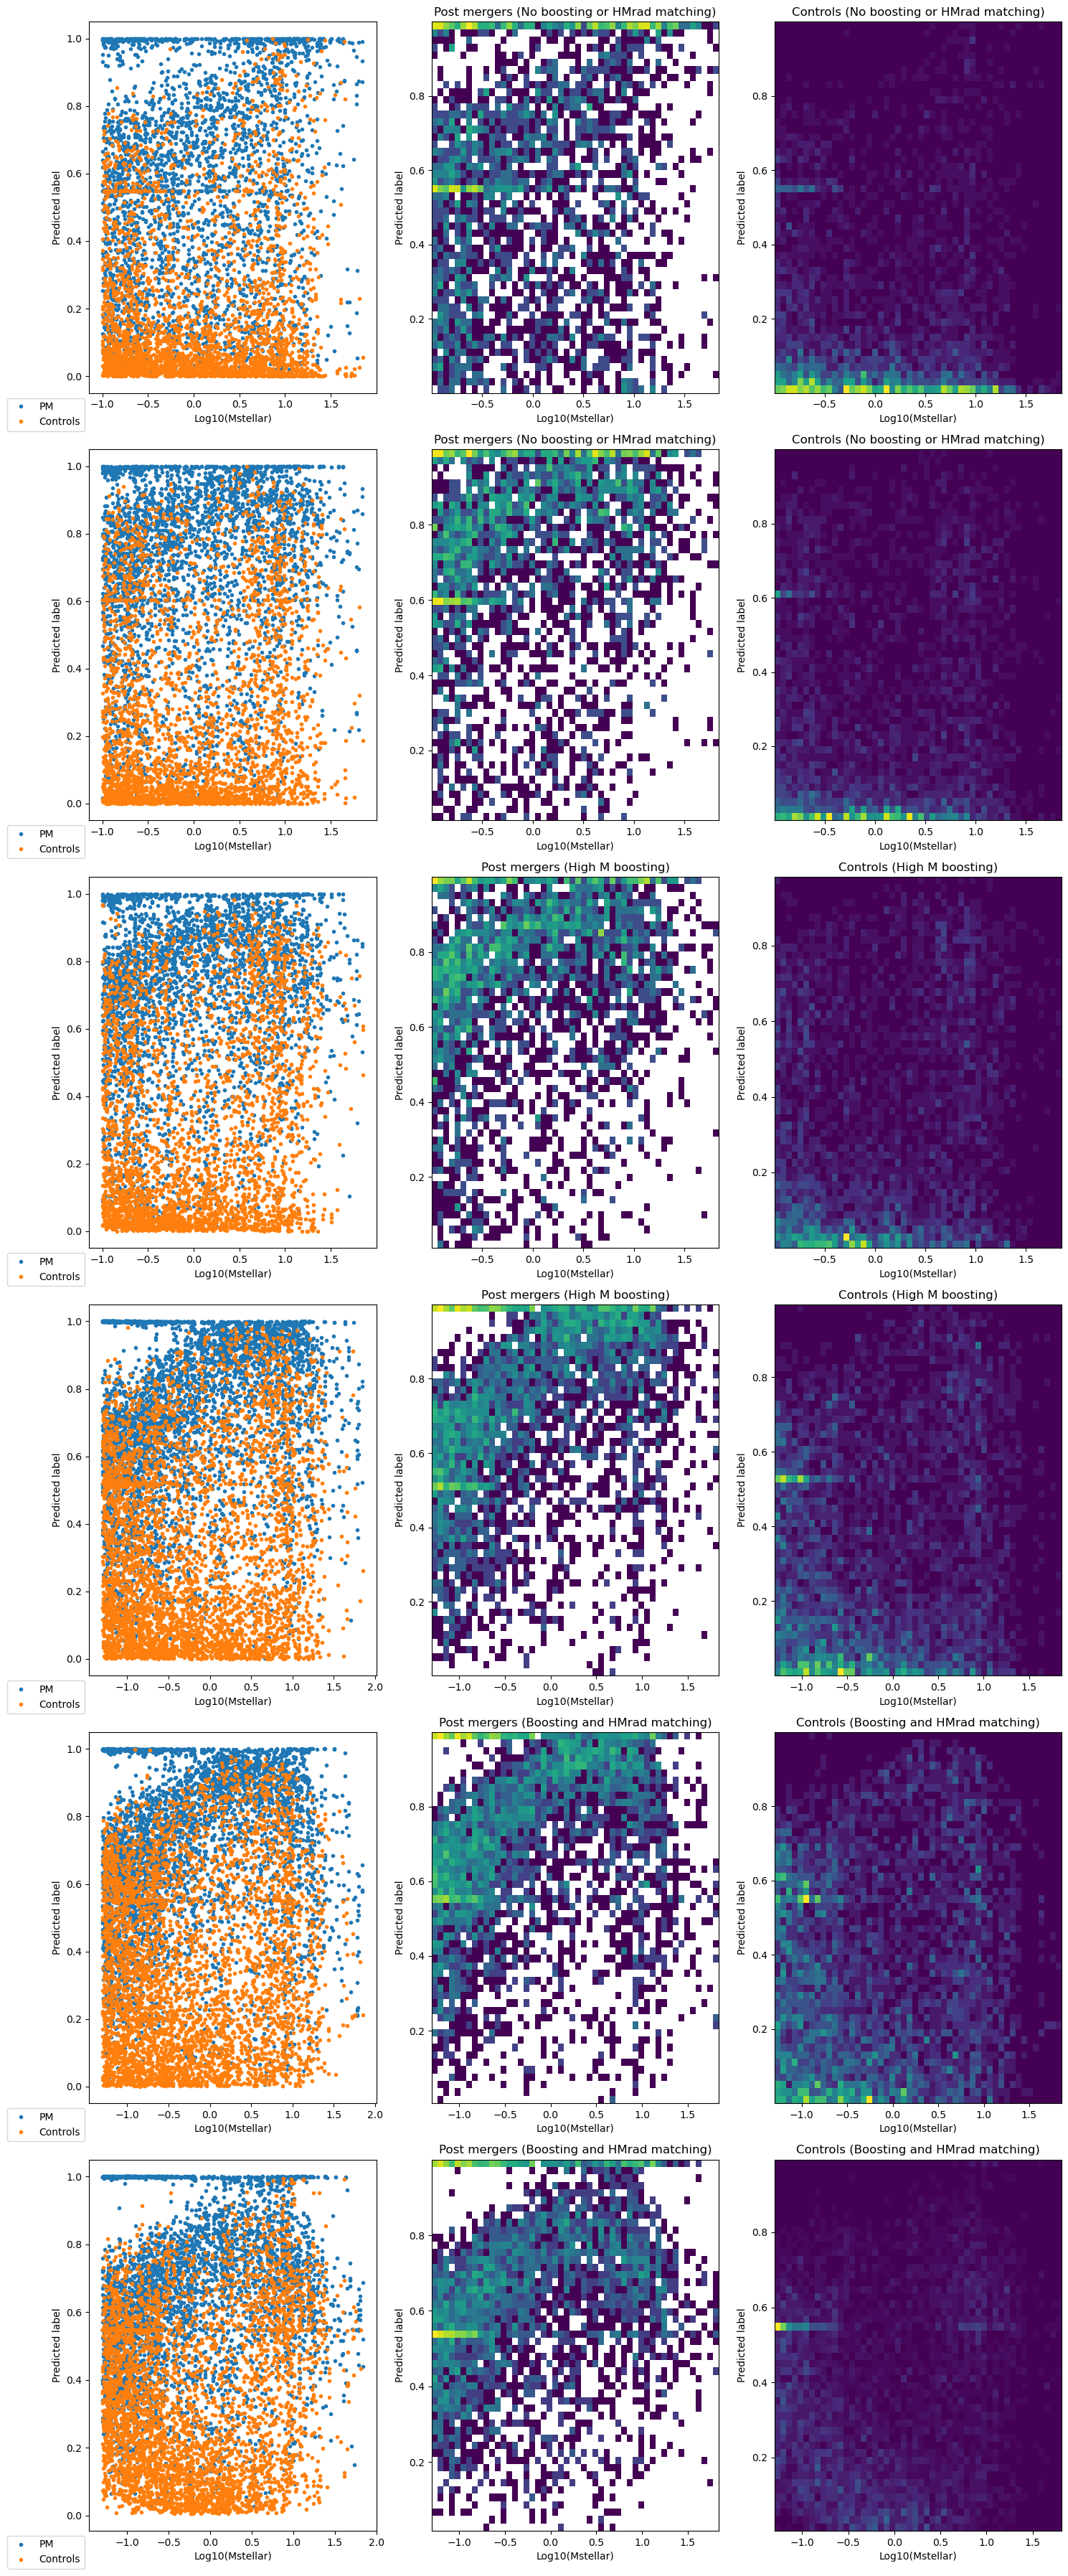

In [16]:
from matplotlib.colors import LogNorm

#results_list = [results_31, results_35, results_42]

param = 'Mstellar'
title_labels = {0: '(No boosting or HMrad matching)', 1: '(No boosting or HMrad matching)' , 2: '(High M boosting)', 3: '(High M boosting)', 4: '(Boosting and HMrad matching)', 5: '(Boosting and HMrad matching)', 6: '(Boosting and HMrad matching)'}



fig = plt.figure(figsize = (15, 6 * len(results_list)))
ax = fig.subplots(len(results_list), 3)

for i, results in enumerate(results_list.values()):
    mergers = results.loc[(results['LABEL'] == 1)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 0)].reset_index(drop = True)

    merger_labels = mergers.loc[mergers[param] > 0]['PRED_LABEL']
    control_labels = controls.loc[controls[param] > 0]['PRED_LABEL']
    merger_masses = np.log10(mergers.loc[mergers[param] > 0][param])
    control_masses = np.log10(controls.loc[controls[param] > 0][param])
    
    merger_labels = mergers.loc[mergers[param] > 0]['PRED_LABEL']
    control_labels = controls.loc[controls[param] > 0]['PRED_LABEL']
    merger_masses = np.log10(mergers.loc[mergers[param] > 0][param])
    control_masses = np.log10(controls.loc[controls[param] > 0][param])

    #fig = plt.figure(figsize = (15,5))
    #ax = fig.subplots(1,3)

    ax[i, 0].plot(merger_masses, merger_labels, '.', label = 'PM')
    ax[i, 0].plot(control_masses, control_labels, '.', label = 'Controls')
    ax[i, 0].legend(bbox_to_anchor=(0, 0))
    #ax[0].set_xscale('log')

    ax[i, 1].hist2d(merger_masses,merger_labels,bins=50, norm = LogNorm())
    ax[i, 2].hist2d(control_masses,control_labels,bins=50)

    ax[i, 1].set_title('Post mergers ' + title_labels[i])
    ax[i, 2].set_title('Controls ' + title_labels[i])

    for axs in ax[i, :]:
        axs.set_xlabel('Log10(%s)'%(param))
        axs.set_ylabel('Predicted label')
fig.tight_layout()

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(run_info)

     RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
135     179        50         75  0.479479   0.304304  0.738854  0.707760   
136     180        50         75  0.539540   0.415415  0.742008  0.700803   
137     181        50         75  0.554555   0.520521  0.777772  0.756227   
138     182        50         50  0.468468   0.383383  0.809526  0.803962   
139     183        50         50  0.479479   0.324324  0.747983  0.717218   
140     184        50         50  0.594595   0.438438  0.806665  0.803060   
141     185        50         50  0.508509   0.346346  0.766906  0.730444   
142     186        50         50  0.446446   0.297297  0.823556  0.823117   
143     187        50         50  0.608609   0.500501  0.827571  0.838027   
144     188        50         50  0.398398   0.256256  0.804625  0.786685   
145     189        50         50  0.088088   0.010010  0.826184  0.842804   

     TRA_LOSS  VAL_LOSS  TEST_SIZE_TRN  TEST_SIZE_VAL  N_PICTURES  \
135  0

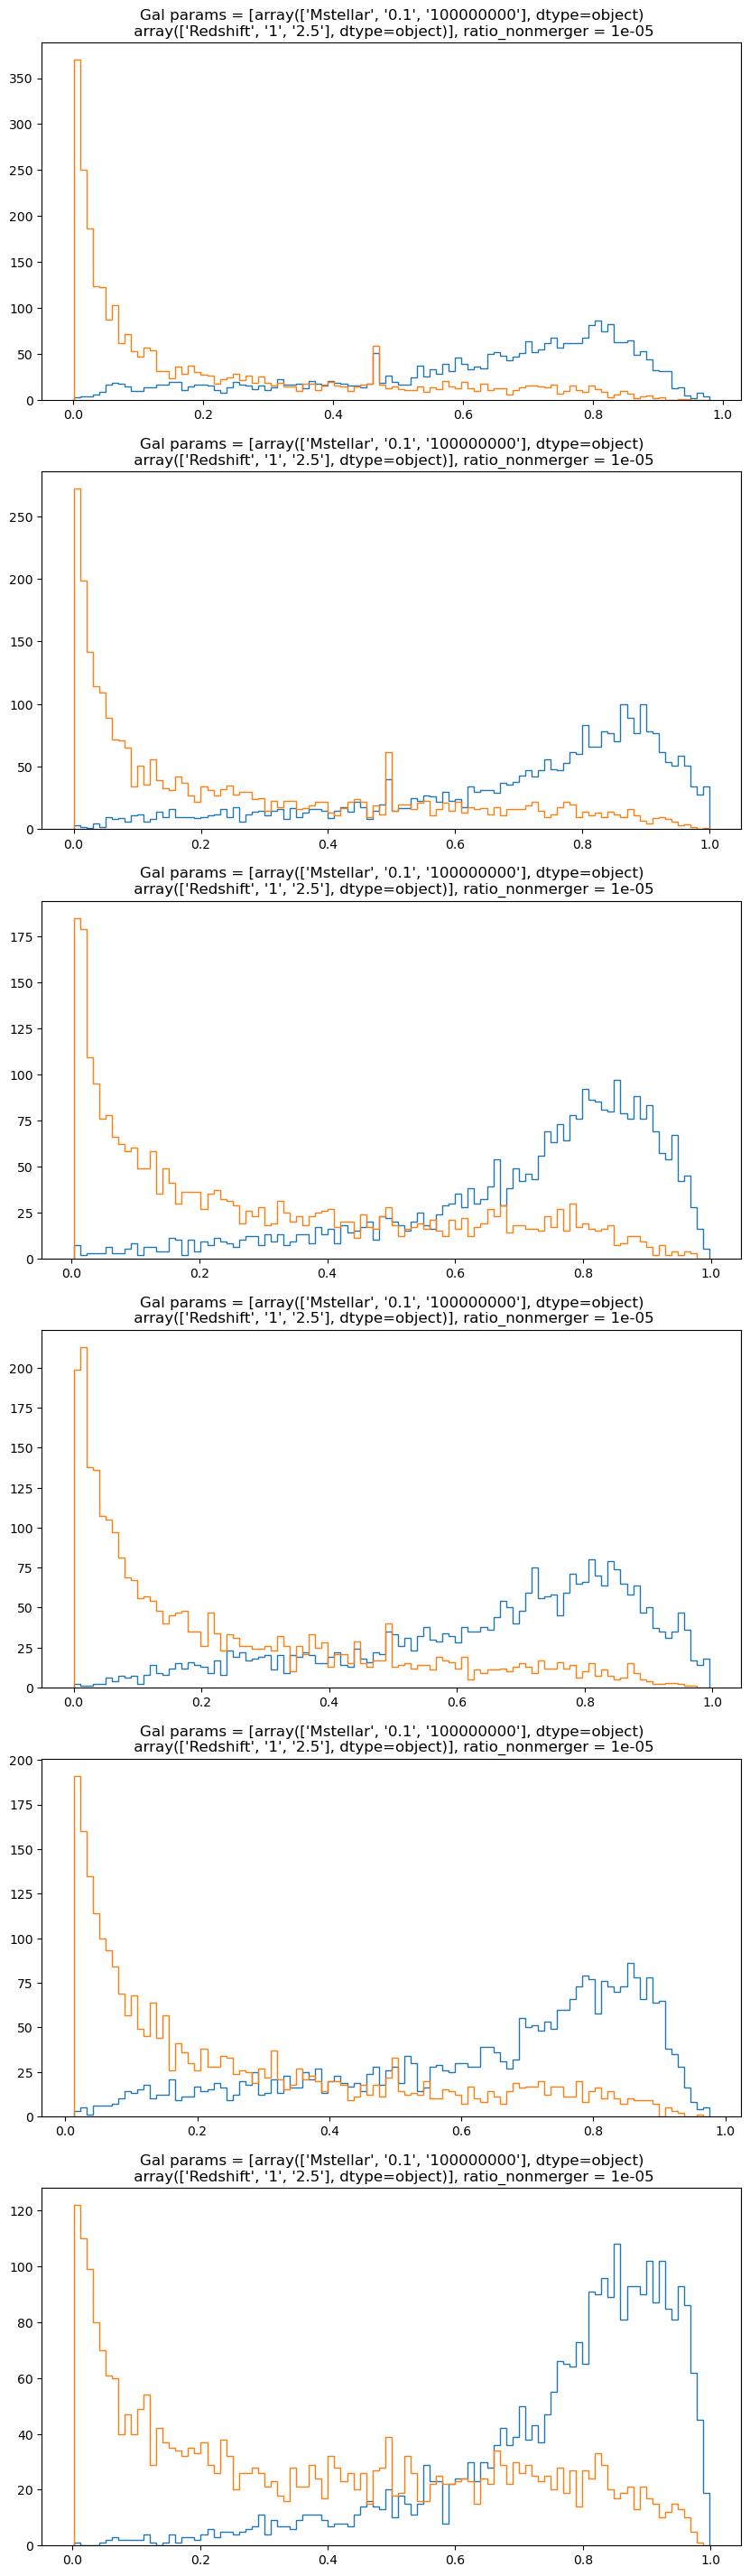

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,6 * len(results_list.values())))
ax = fig.subplots(len(results_list.values()), 1)

for i, key in enumerate(results_list.keys()):
    
    results = results_list[key]
    counts, edges, bins = ax[i].hist(results.loc[results['LABEL'] == 1]['PRED_LABEL'], bins = 100,histtype = 'step')
    ax[i].hist(results.loc[results['LABEL'] == 0]['PRED_LABEL'], bins = edges,histtype = 'step')
    ax[i].set_title('Gal params = ' + str(run_info[run_info.RUN_ID == key]['gal_params'].values[0]) + ', ratio_nonmerger = ' + str(run_info.loc[run_info.RUN_ID == key]['ratio_nonmerger'].values[0]))

In [97]:
results = results_list[178]
labels = results['PRED_LABEL']

In [98]:
label_counts = []

for label in labels:
    count = 0
    for other_label in labels:
        if label == other_label:
            count += 1
    label_counts.append([label, count])
        

In [100]:
label_counts = np.array(label_counts)

In [101]:
label_counts[label_counts[:, 1].argsort()]

array([[5.2224034e-01, 1.0000000e+00],
       [7.6314546e-03, 1.0000000e+00],
       [5.6754110e-01, 1.0000000e+00],
       ...,
       [5.5806094e-01, 2.5300000e+02],
       [5.5806094e-01, 2.5300000e+02],
       [5.5806094e-01, 2.5300000e+02]])

In [102]:
results_filt = results[results['PRED_LABEL'] == 5.5806094e-01]

In [91]:
results

SFID  SnapNum   Mstellar       MBH         MDM       Mgas  \
10     88521.0     50.0  24.091759  0.094427  966.619629  89.721672   
24    130645.0     46.0  14.932034  0.087683  372.761444  24.850111   
35    203263.0     31.0   0.105671  0.000111   18.980270   3.550233   
69    175597.0     29.0   0.277198  0.000511   22.032928   2.903602   
96    231722.0     36.0   0.132507  0.000119   24.337841   5.119059   
...        ...      ...        ...       ...         ...        ...   
6257   12916.0     32.0   0.137152  0.000340    3.980892   0.505777   
6321   35391.0     28.0   7.850640  0.047688  181.638687  20.147341   
6329   93026.0     30.0   0.774462  0.001612   16.406391   2.630980   
6344  171806.0     29.0   0.115148  0.000263   13.321882   1.459303   
6390  338667.0     38.0   0.124031  0.000301   17.223400   1.867638   

            SFR         Z      HMRad     BHacc  ...  dt_biggest  SFID_biggest  \
10    12.992040  0.017918   8.172222  0.000325  ...       0.000       88521.0   
24    12.507128  0.012771  17.013527  0.001422  ...       0.000           0.0   
35     2.618514  0.004060  12.165909  0.000053  ...       0.000           0.0   
69     3.755460  0.012142   7.678965  0.000492  ...       0.146      167320.0   
96     3.516783  0.002873  15.078295  0.000076  ...       0.000      231722.0   
...         ...       ...        ...       ...  ...         ...           ...   
6257   4.109603  0.008235   5.635023  0.000207  ...       0.148       11338.0   
6321  32.541439  0.016522   4.164515  0.000666  ...       0.301       23683.0   
6329  15.256442  0.011243   9.333397  0.002675  ...       0.000           0.0   
6344   2.148872  0.009580   5.890995  0.000635  ...       0.301      142205.0   
6390   1.344024  0.010668   4.716549  0.000094  ...       0.136      332497.0   

      snap_biggest  Redshift   GAS_FRAC  PRED_LABEL  LABEL  Edd_ratio  \
10            50.0      1.00   3.724164    0.558061    1.0   0.000111   
24             0.0      1.15   1.664215    0.558061    0.0   0.000523   
35             0.0      2.21  33.596930    0.558061    0.0   0.015526   
69            28.0      2.44  10.474813    0.558061    1.0   0.031018   
96            36.0      1.74  38.632478    0.558061    1.0   0.020651   
...            ...       ...        ...         ...    ...        ...   
6257          31.0      2.10   3.687702    0.558061    1.0   0.019593   
6321          26.0      2.58   2.566331    0.558061    1.0   0.000451   
6329           0.0      2.32   3.397173    0.558061    0.0   0.053537   
6344          27.0      2.44  12.673249    0.558061    1.0   0.077775   
6390          37.0      1.60  15.057862    0.558061    1.0   0.010130   

      Mass/radius**2   SFR/Mass  
10          0.360735   0.539273  
24          0.051586   0.837604  
35          0.000714  24.779792  
69          0.004701  13.547911  
96          0.000583  26.540433  
...              ...        ...  
6257        0.004319  29.963782  
6321        0.452664   4.145068  
6329        0.008890  19.699416  
6344        0.003318  18.661785  
6390        0.005575  10.836220  

[253 rows x 25 columns]

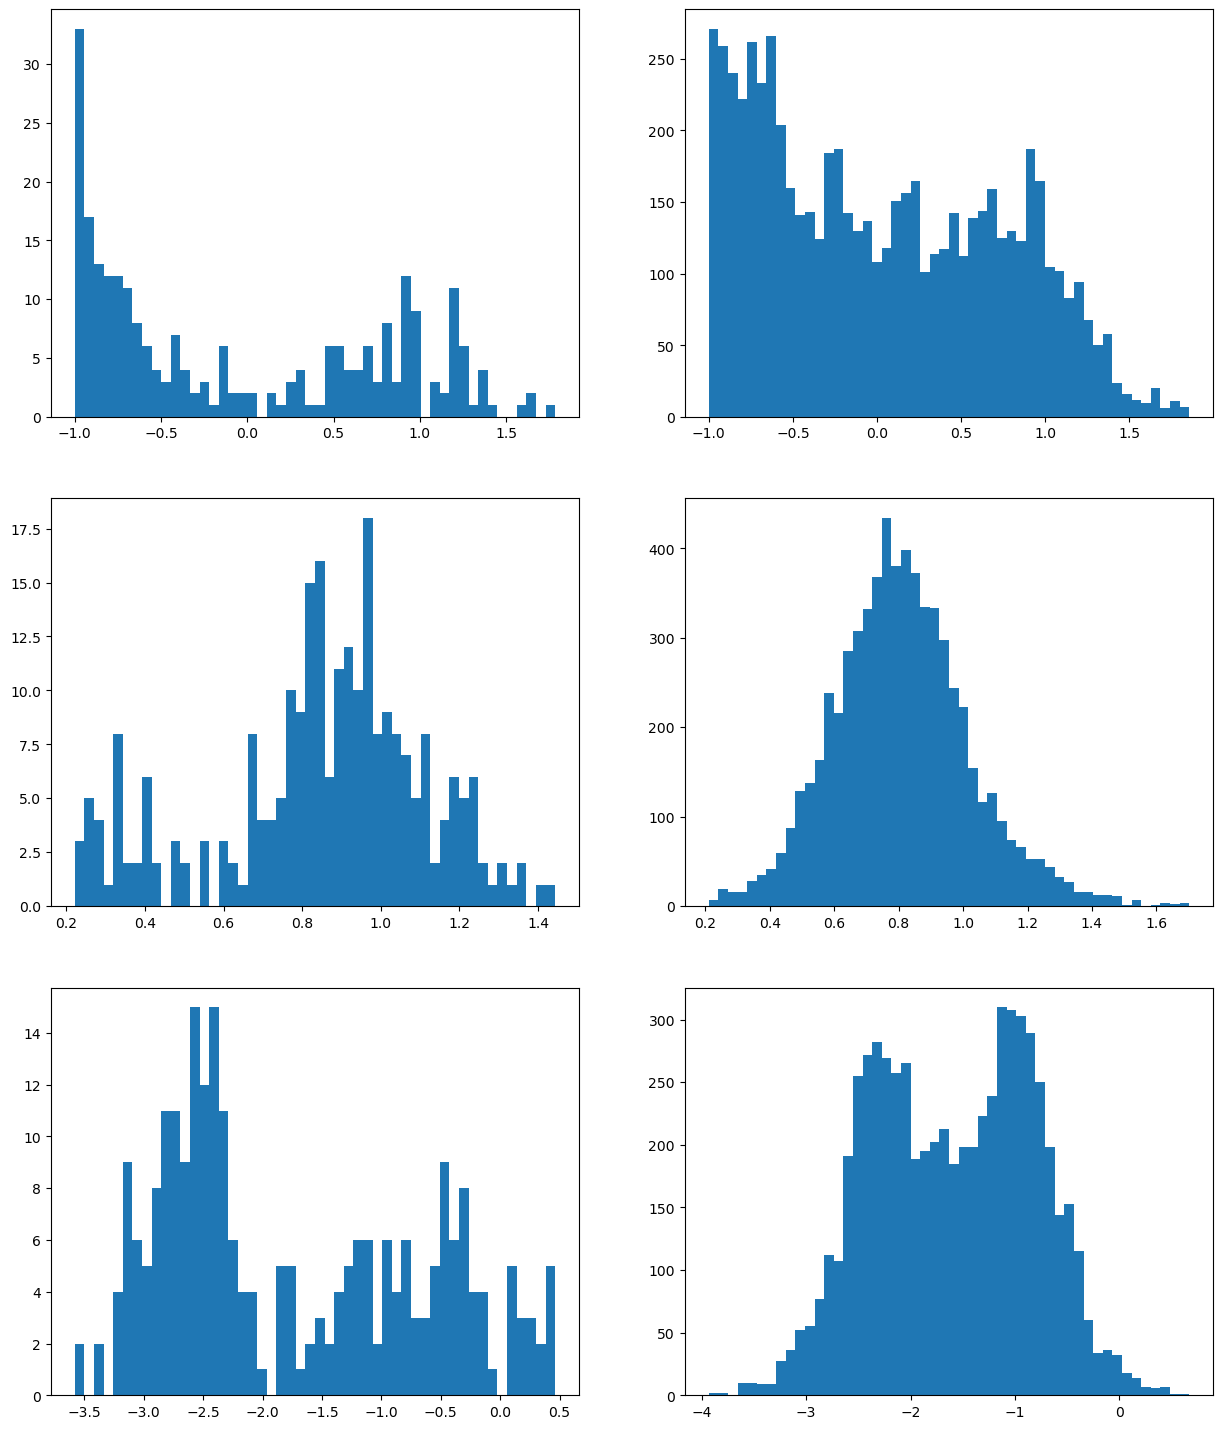

In [107]:
params = ['Mstellar', 'HMRad', 'Mass/radius**2']

fig = plt.figure(figsize = (15, 6* len(params)))
ax = fig.subplots(len(params), 2)

for i, param in enumerate(params):
    
    ax[i, 0].hist(np.log10(results_filt[param]), bins = 50)
    ax[i, 1].hist(np.log10(results[param]), bins = 50)

In [40]:
probs_ = [[1,2], [3,4], [5,6]]

In [41]:
probs_ = np.array(probs_)

In [46]:
np.sum(probs_[:,0])/len(probs_)

3.0

In [61]:
a = np.array((2,2))

In [62]:
a

array([2, 2])